<a href="https://colab.research.google.com/github/TuringCollegeSubmissions/jklevi-DA.4/blob/master/241_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal for this project is to get a better understanding of european football leagues, players and to create a model from which we can predict the outcome on which a sports bet can be made.

The data we will be working on consist of 7 dataframes with information on european leagues, individual matches, players, teams and their attributes

Link to looker studio charts: https://lookerstudio.google.com/reporting/1f387ccf-892a-4f77-9280-04ac5c70f77c

## Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import duckdb as db

In [10]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
con = sqlite3.connect("/content/drive/MyDrive/DataFiles/database_football.sqlite")

cur = con.cursor()

In [12]:
df_country = pd.read_sql_query("SELECT * FROM Country", con)
df_league = pd.read_sql_query("SELECT * FROM League", con)
df_match = pd.read_sql_query("SELECT * FROM Match", con)
df_player = pd.read_sql_query("SELECT * FROM Player", con)
df_player_attrb = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
df_team = pd.read_sql_query("SELECT * FROM Team", con)
df_team_attrb = pd.read_sql_query("SELECT * FROM Team_Attributes", con)

In [13]:
pd.set_option("display.max_columns", None)

In [14]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [15]:
df_league.head(50)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [16]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [17]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [18]:
df_player_attrb.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [19]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [20]:
df_team_attrb.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


## EDA

In [ ]:
df_country.rename(columns={"id": "country_id", "name": "country"}, inplace=True)
df_league.rename(columns={"name": "league"}, inplace=True)
df_league_country = df_league.merge(df_country, on="country_id")

In [ ]:
print("Different leagues: ", df_league_country.league.nunique())
print("Different countries", df_league_country.country.nunique())
print("Na values: ", df_league_country[["league", "country"]].isna().sum())

Different leagues:  11
Different countries 11
Na values:  league     0
country    0
dtype: int64


We have data from 11 countries and 11 leagues for each country

In [ ]:
db.sql(
    """ SELECT season, COUNT(*) AS occurrences
          FROM df_match
          GROUP BY season;
          """
).to_df()

,season,occurrences
0,2009/2010,3230
1,2010/2011,3260
2,2012/2013,3260
3,2013/2014,3032
4,2008/2009,3326
5,2011/2012,3220
6,2014/2015,3325
7,2015/2016,3326


seasons from 2008/2009 until 2015/2016

In [ ]:
season_counts = db.sql(
    """ SELECT season, league_id, COUNT(*) AS occurrences
                          FROM df_match
                          GROUP BY season, league_id;
                          """
).to_df()
season_sums = db.sql(
    """ SELECT season, league_id, SUM(occurrences) AS occurrences
                          FROM season_counts
                          GROUP BY season, league_id;
                          """
).to_df()

In [ ]:
league_counts = df_match["league_id"].value_counts().reset_index()
league_counts.columns = ["league_id", "occurrences"]

In [ ]:
league_counts = db.sql(
    """ SELECT league_id, COUNT(*) AS occurrences
                          FROM df_match
                          GROUP BY league_id;
                          """
).to_df()
league_counts.columns = ["league_id", "occurrences"]

In [ ]:
db.sql(
    """ SELECT league_counts.occurrences, df_league.league
          FROM league_counts
          LEFT JOIN df_league ON league_counts.league_id = df_league.id
          ORDER BY league_counts.occurrences DESC;
"""
).to_df()

,occurrences,league
0,3040,Spain LIGA BBVA
1,3040,England Premier League
2,3040,France Ligue 1
3,3017,Italy Serie A
4,2448,Germany 1. Bundesliga
5,2448,Netherlands Eredivisie
6,2052,Portugal Liga ZON Sagres
7,1920,Poland Ekstraklasa
8,1824,Scotland Premier League
9,1728,Belgium Jupiler League


England Premier League, France Ligue 1 and Spain LIGA BBVA has most match data - 3040 matches for all seasons

In [ ]:
same_occurrences = season_sums.groupby("league_id")["occurrences"].nunique() == 1

same_occurrences_leagues = same_occurrences[same_occurrences].index

different_occurrences_leagues = same_occurrences[~same_occurrences].index

In [ ]:
same_occurrences_league_names = df_league[
    df_league["country_id"].isin(same_occurrences_leagues)
]["league"].tolist()

different_occurrences_league_names = df_league[
    df_league["country_id"].isin(different_occurrences_leagues)
]["league"].tolist()

In [ ]:
print("Leagues without missing matches in 8 seasons:", same_occurrences_league_names)
print("Leagues with missing matches in 8 seasons:", different_occurrences_league_names)
print("Note: data consists of 8 seasons")

Leagues without missing matches in 8 seasons: ['England Premier League', 'France Ligue 1', 'Germany 1. Bundesliga', 'Netherlands Eredivisie', 'Poland Ekstraklasa', 'Scotland Premier League', 'Spain LIGA BBVA']
Leagues with missing matches in 8 seasons: ['Belgium Jupiler League', 'Italy Serie A', 'Portugal Liga ZON Sagres', 'Switzerland Super League']
Note: data consists of 8 seasons


In [ ]:
seasons_list = [f"{year}/{year+1}" for year in range(2008, 2015)]

filtered_season_sums = season_sums[season_sums["season"].isin(seasons_list)]

grouped = filtered_season_sums.groupby("league_id")

all_seasons_leagues = [
    league_id for league_id, group in grouped if len(group) == len(seasons_list)
]

not_all_seasons_leagues = [
    league_id for league_id, group in grouped if len(group) < len(seasons_list)
]

all_seasons_league_names = df_league[df_league["id"].isin(all_seasons_leagues)][
    "league"
].tolist()
not_all_seasons_league_names = df_league[df_league["id"].isin(not_all_seasons_leagues)][
    "league"
].tolist()

In [ ]:
print("Leagues with matches for seasons (2008/2009 to 2015/2016):")
for league in all_seasons_league_names:
    print(league)

Leagues with matches for seasons (2008/2009 to 2015/2016):
Belgium Jupiler League
England Premier League
France Ligue 1
Germany 1. Bundesliga
Italy Serie A
Netherlands Eredivisie
Poland Ekstraklasa
Portugal Liga ZON Sagres
Scotland Premier League
Spain LIGA BBVA
Switzerland Super League


In [ ]:
print("\nLeagues with missing seasons (2008/2009 to 2015/2016):")
for league in not_all_seasons_league_names:
    print(league)


Leagues with missing seasons (2008/2009 to 2015/2016):


every league has match data for seasons 2008/2009 - 2015/2016

In [ ]:
df_player_table = df_player.copy()

In [ ]:
df_player_table["weight"] = df_player_table["weight"] * 0.453592
df_player_table["weight"] = df_player_table["weight"].round()

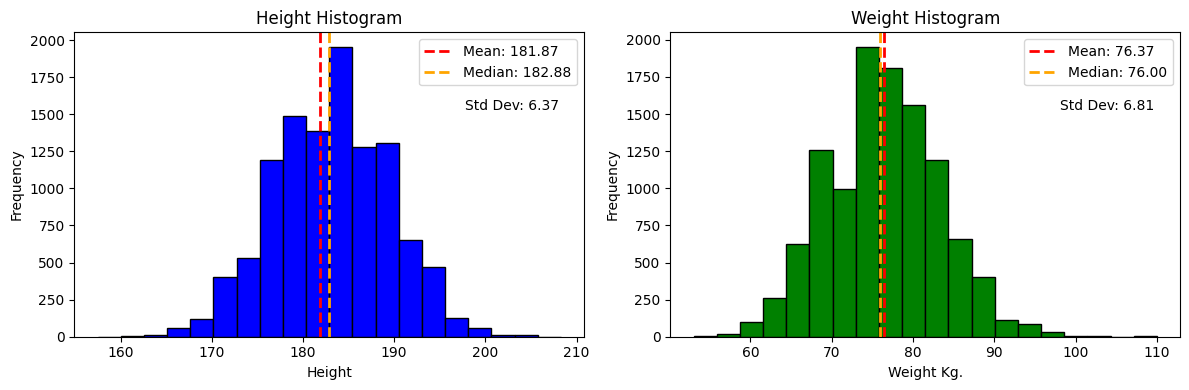

In [ ]:
height = df_player_table["height"]
weight = df_player_table["weight"]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(height, bins=20, color="blue", edgecolor="black")
axes[0].axvline(
    x=height.mean(),
    color="red",
    linestyle="dashed",
    linewidth=2,
    label=f"Mean: {height.mean():.2f}",
)
axes[0].axvline(
    x=height.median(),
    color="orange",
    linestyle="dashed",
    linewidth=2,
    label=f"Median: {height.median():.2f}",
)
axes[0].set_title("Height Histogram")
axes[0].set_xlabel("Height")
axes[0].set_ylabel("Frequency")
axes[0].text(
    0.95,
    0.78,
    f"Std Dev: {height.std():.2f}",
    ha="right",
    va="top",
    transform=axes[0].transAxes,
)
axes[0].legend()

axes[1].hist(weight, bins=20, color="green", edgecolor="black")
axes[1].axvline(
    x=weight.mean(),
    color="red",
    linestyle="dashed",
    linewidth=2,
    label=f"Mean: {weight.mean():.2f}",
)
axes[1].axvline(
    x=weight.median(),
    color="orange",
    linestyle="dashed",
    linewidth=2,
    label=f"Median: {weight.median():.2f}",
)
axes[1].set_title("Weight Histogram")
axes[1].set_xlabel("Weight Kg.")
axes[1].set_ylabel("Frequency")
axes[1].text(
    0.95,
    0.78,
    f"Std Dev: {weight.std():.2f}",
    ha="right",
    va="top",
    transform=axes[1].transAxes,
)
axes[1].legend()

plt.tight_layout()
plt.show()

Height and weight distribution of players across all leagues and 8 seasons

In [ ]:
df_player_table.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,85.0
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,66.0
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,74.0
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,90.0
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,70.0


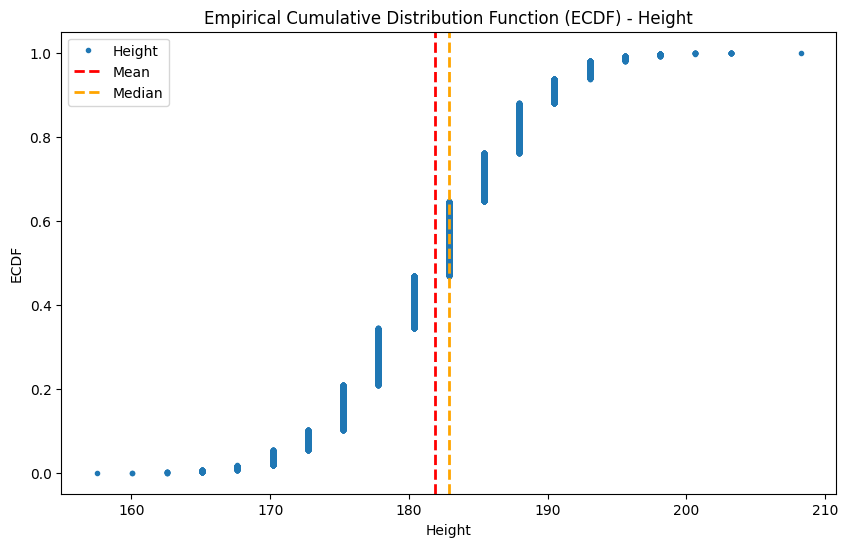

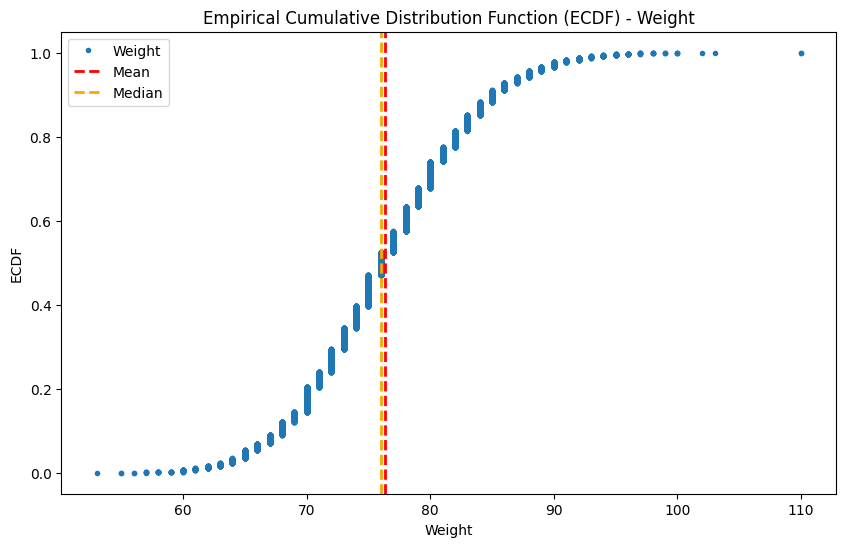

In [ ]:
heights = df_player_table["height"].values
weights = df_player_table["weight"].values

heights_sorted = np.sort(heights)
weights_sorted = np.sort(weights)

ecdf_heights = np.arange(1, len(heights_sorted) + 1) / len(heights_sorted)
ecdf_weights = np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

plt.figure(figsize=(10, 6))
plt.plot(heights_sorted, ecdf_heights, marker=".", linestyle="none", label="Height")
plt.axvline(
    x=np.mean(heights), color="red", linestyle="dashed", linewidth=2, label="Mean"
)
plt.axvline(
    x=np.median(heights),
    color="orange",
    linestyle="dashed",
    linewidth=2,
    label="Median",
)
plt.xlabel("Height")
plt.ylabel("ECDF")
plt.title("Empirical Cumulative Distribution Function (ECDF) - Height")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(weights_sorted, ecdf_weights, marker=".", linestyle="none", label="Weight")
plt.axvline(
    x=np.mean(weights), color="red", linestyle="dashed", linewidth=2, label="Mean"
)
plt.axvline(
    x=np.median(weights),
    color="orange",
    linestyle="dashed",
    linewidth=2,
    label="Median",
)
plt.xlabel("Weight")
plt.ylabel("ECDF")
plt.title("Empirical Cumulative Distribution Function (ECDF) - Weight")
plt.legend()
plt.show()

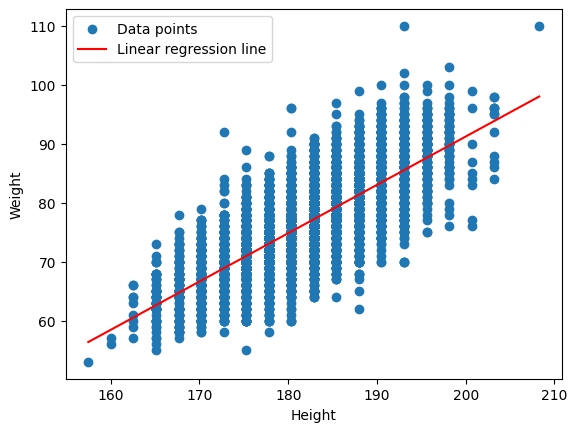

In [ ]:
from scipy.stats import linregress

height = df_player_table["height"]
weight = df_player_table["weight"]

slope, intercept, r_value, p_value, std_err = linregress(height, weight)

plt.scatter(height, weight, label="Data points")

x = np.linspace(height.min(), height.max(), 100)
y = slope * x + intercept
plt.plot(x, y, color="red", label="Linear regression line")

plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()

plt.show()

With over 11000 observations of football players, average weight and height is 76kg and 182cm with a standard deviation of 6.8 and 6.4.

In [ ]:
df_team_attrb_eda = df_team_attrb.copy()

In [ ]:
df_team_attrb_eda["date"] = pd.to_datetime(df_team_attrb_eda["date"], format="%Y-%m-%d")


# date column has only 2 months - february and september
def convert_date(row):
    date = pd.to_datetime(row["date"])
    if date.month == 9:
        return f"{date.year}/{date.year + 1}"
    elif date.month == 2:
        return f"{date.year - 1}/{date.year}"
    else:
        return date.strftime("%Y-%m-%d")


df_team_attrb_eda["date"] = df_team_attrb_eda.apply(convert_date, axis=1)

In [ ]:
teams_table = (
    df_match.groupby(["season", "league_id"])["home_team_api_id"].unique().reset_index()
)
teams_table = teams_table.rename(columns={"home_team_api_id": "team_api_id"})

In [ ]:
team_counts = teams_table.copy()
team_counts.team_api_id = team_counts.team_api_id.apply(len)

In [ ]:
team_counts = team_counts.rename(columns={"team_api_id": "team_count"})

In [ ]:
db.sql(
    """ SELECT team_counts.team_count, team_counts.season, df_league.league
FROM team_counts
LEFT JOIN df_league ON team_counts.league_id = df_league.id
ORDER BY team_counts.team_count ASC
LIMIT 10"""
).to_df()

,team_count,season,league
0,4,2013/2014,Belgium Jupiler League
1,10,2008/2009,Switzerland Super League
2,10,2009/2010,Switzerland Super League
3,10,2010/2011,Switzerland Super League
4,10,2011/2012,Switzerland Super League
5,10,2012/2013,Switzerland Super League
6,10,2013/2014,Switzerland Super League
7,10,2014/2015,Switzerland Super League
8,10,2015/2016,Switzerland Super League
9,12,2008/2009,Scotland Premier League


In [ ]:
db.sql(
    """ SELECT *
          FROM team_counts
          WHERE league_id = 1;
"""
).to_df()

,season,league_id,team_count
0,2008/2009,1,18
1,2009/2010,1,15
2,2010/2011,1,16
3,2011/2012,1,16
4,2012/2013,1,16
5,2013/2014,1,4
6,2014/2015,1,16
7,2015/2016,1,16


Belgium Jupiler League has data with inconsistent number of teams throughout 8 seasons

In [ ]:
combinations = teams_table.explode("team_api_id")
combinations = combinations[["season", "league_id", "team_api_id"]]
combinations = combinations.drop_duplicates()

In [ ]:
missing_data = pd.merge(
    combinations,
    df_team_attrb_eda,
    how="left",
    left_on=["season", "team_api_id"],
    right_on=["date", "team_api_id"],
)
missing_data = missing_data[missing_data["date"].isna()]

In [ ]:
distinct_combinations = missing_data[["league_id", "season"]].drop_duplicates()

In [ ]:
distinct_combinations = distinct_combinations.merge(
    df_league[["league", "id"]], left_on="league_id", right_on="id", how="left"
)
distinct_combinations.drop(axis=1, labels="id", inplace=True)

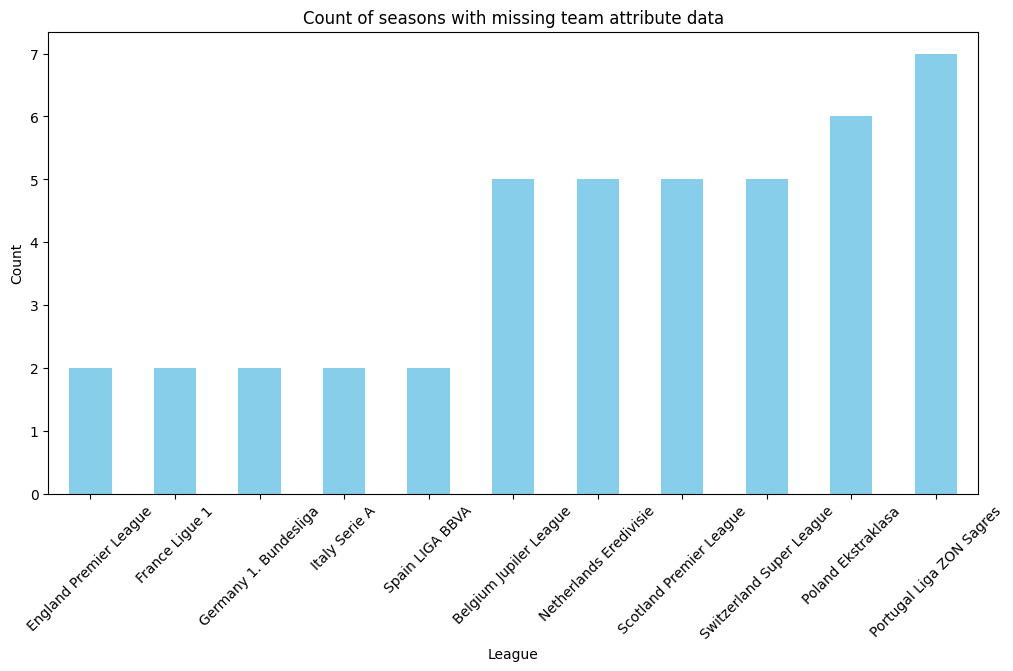

In [ ]:
counts = distinct_combinations["league"].value_counts().sort_values()

plt.figure(figsize=(12, 6))
counts.plot(kind="bar", color="skyblue")
plt.title("Count of seasons with missing team attribute data")
plt.xlabel("League")
plt.ylabel("Count")

plt.xticks(rotation=45)

plt.show()

Every league has missing data for team attributes, there are 5 leagues with missing data for only 2 seasons (2008/2009 and 2012/2013): England Premier League, France Ligue 1, Germany Bundesliga, Italy Serie A and Spain LIGA BBVA

   
    Who are the top scorers in each league?
    Which leagues score the most/fewest goals?
    Who are the best players by overall rating of all time?
    Is there such a thing as home advantage?
    Does home team score significantly more goals than away team?
    Predicting players overall score
    Which league has the most talented players?
    Predicting end of season points for teams
    Predicting goals
    Predicting the outcome of a match
    Does team attributes exhibit a statistically significant difference across various leagues?
    Best performing teams

## Who are the top scorers in each league?

### Extracting XML data from df_match goal column and converting to dataframe

In [ ]:
goal_na_count = (
    df_match.groupby("league_id")["goal"]
    .apply(lambda x: x.isna().sum())
    .reset_index(name="goals_missing")
)

In [ ]:
goal_na_count.merge(
    df_league[["id", "league"]], left_on="league_id", right_on="id"
).drop(axis=1, labels="id").sort_values(by="goals_missing", ascending=False)

,league_id,goals_missing,league
7,17642,2052,Portugal Liga ZON Sagres
5,13274,1918,Netherlands Eredivisie
6,15722,1913,Poland Ekstraklasa
8,19694,1811,Scotland Premier League
0,1,1728,Belgium Jupiler League
10,24558,1322,Switzerland Super League
2,4769,1014,France Ligue 1
4,10257,3,Italy Serie A
9,21518,1,Spain LIGA BBVA
1,1729,0,England Premier League


German, England, Spanish and French leagues have least rows of information missing if any about goals in match.

In [ ]:
import xml.etree.ElementTree as ET

goals_data = []

for index, row in df_match.iterrows():
    match_api_id = row["match_api_id"]
    goal_data = row["goal"]

    if goal_data is not None:
        root = ET.fromstring(goal_data)

        for value in root.iter("value"):  # Iterating through XML elements
            stats = value.find("stats")
            if (
                stats is not None
            ):  # Checking for existence of specific XML elements like stats, goals, shoton etc.
                goals_element = stats.find("goals")
                shoton_element = stats.find("shoton")
                elapsed = value.find("elapsed")
                player1 = value.find("player1")
                team = value.find("team")
                id_element = value.find("id")
                n = value.find("n")
                goal_type = value.find("goal_type")

                if all(
                    elem is not None
                    for elem in [
                        goals_element,
                        shoton_element,
                        elapsed,
                        player1,
                        team,
                        id_element,
                        n,
                        goal_type,
                    ]
                ):  # Creates dictionary from XML elements
                    data = {
                        "match_api_id": match_api_id,
                        "goals": int(goals_element.text),
                        "shoton": int(shoton_element.text),
                        "elapsed": int(elapsed.text),
                        "player1": int(player1.text),
                        "team": int(team.text),
                        "id": int(id_element.text),
                        "n": int(n.text),
                        "type": value.find("type").text,
                        "goal_type": goal_type.text,
                    }
                    goals_data.append(data)

goals_df = pd.DataFrame(goals_data)

In [ ]:
goals_df.drop(axis=1, labels=["goals", "shoton", "id", "type"], inplace=True)

In [ ]:
goals_df.rename(columns={"elapsed": "goal_minute", "player1": "player"}, inplace=True)

### Top scorers in each league

In [ ]:
goals_copy = goals_df.copy()

In [ ]:
goals_copy = goals_copy.merge(
    df_match[["match_api_id", "league_id"]], on="match_api_id"
)

In [ ]:
player_counts = goals_copy.groupby(["league_id", "player"])["player"].count()

In [ ]:
player_counts_df = player_counts.reset_index(name="goals_scored")

In [ ]:
max_player_counts = player_counts_df.groupby("league_id")["goals_scored"].idxmax()

top_players_by_league = player_counts_df.loc[max_player_counts]

In [ ]:
top_players_by_league.sort_values(by="goals_scored", ascending=False, inplace=True)

In [ ]:
top_players_by_league = top_players_by_league.merge(
    df_player[["player_name", "player_api_id"]],
    left_on="player",
    right_on="player_api_id",
)

In [ ]:
top_players_by_league = top_players_by_league.merge(
    df_league[["id", "league"]], left_on="league_id", right_on="id"
)

In [ ]:
top_players_by_league.drop(
    axis=1, labels=["id", "player_api_id", "league_id", "player"], inplace=True
)

In [ ]:
top_players_by_league

,goals_scored,player_name,league
0,245,Lionel Messi,Spain LIGA BBVA
1,120,Antonio Di Natale,Italy Serie A
2,113,Robert Lewandowski,Germany 1. Bundesliga
3,106,Wayne Rooney,England Premier League
4,89,Zlatan Ibrahimovic,France Ligue 1
5,39,Luuk de Jong,Netherlands Eredivisie
6,12,Guillaume Hoarau,Switzerland Super League
7,6,Kenny Miller,Scotland Premier League
8,3,Artjoms Rudnevs,Poland Ekstraklasa


Because only 4 leagues has none or very few rows of missing data of goals, we can state that best players for their leagues are:


Lionel Messi - Spain LIGA ABBVA

Robert Lewandowski - Germany Bundesliga

Wayne Rooney - England Premier League

Zlatan Ibrahimovic - France Ligue 1

## Which leagues score the most/fewest goals?

Belgium league 13/14 season has uncomplete data with only 30 matches played

In [ ]:
df_goals = df_match.copy()

In [ ]:
df_goals = df_goals[["league_id", "season", "home_team_goal", "away_team_goal"]]

In [ ]:
df_goals["goals"] = df_goals["home_team_goal"] + df_goals["away_team_goal"]
df_goals["matches"] = 1

<ipython-input-77-3a61fc5da097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goals["goals"] = df_goals["home_team_goal"] + df_goals["away_team_goal"]
<ipython-input-77-3a61fc5da097>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goals["matches"] = 1


In [ ]:
df_goals.drop(["home_team_goal", "away_team_goal"], axis=1, inplace=True)

<ipython-input-78-b9d705739fc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goals.drop(["home_team_goal", "away_team_goal"], axis=1, inplace=True)


In [ ]:
df_goals = (
    df_goals.groupby(["league_id", "season"])[["goals", "matches"]]
    .apply(lambda x: x.astype(int).sum())
    .reset_index()
)

In [ ]:
df_goals["goals_per_game"] = df_goals["goals"] / df_goals["matches"]

In [ ]:
df_goals = (
    df_goals.groupby(["league_id"])["goals_per_game"]
    .apply(lambda x: x.astype(float).mean())
    .reset_index()
)

In [ ]:
df_goals = df_goals.merge(
    df_league_country, how="left", left_on="league_id", right_on="id"
)

In [ ]:
df_goals = df_goals[["league", "goals_per_game"]].sort_values(
    by="goals_per_game", ascending=False
)

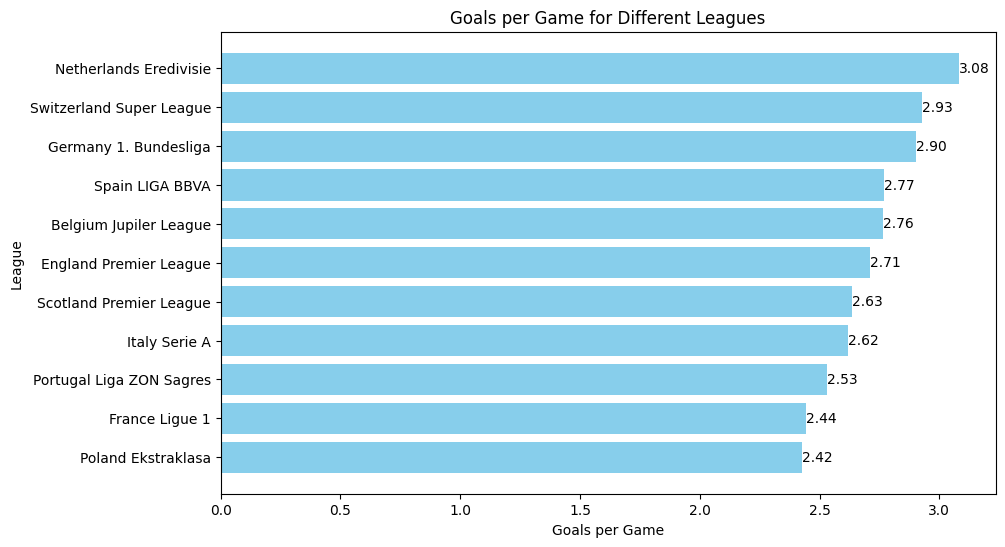

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(df_goals["league"], df_goals["goals_per_game"], color="skyblue")
ax.set_xlabel("Goals per Game")
ax.set_ylabel("League")
ax.set_title("Goals per Game for Different Leagues")
ax.invert_yaxis()


[
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.2f}",
        va="center",
        ha="left",
        fontsize=10,
        color="black",
    )
    for bar in bars
]

plt.show()

Netherlands Eredivisie is the most entertaining league to watch with 3.08 goals per game, while Polands Ekstraklasa league scores only 2.43 goals per game

## Who are the best players by overall rating of all time?

In [ ]:
unique_player_ratings = (
    df_player_attrb[["player_api_id", "overall_rating"]]
    .drop_duplicates()
    .sort_values(by="overall_rating", ascending=False)
)

In [ ]:
unique_player_ratings = unique_player_ratings.merge(
    df_player, on="player_api_id", how="left"
)

In [ ]:
unique_player_ratings = unique_player_ratings.drop_duplicates(subset="player_name")

In [ ]:
unique_player_ratings = unique_player_ratings[
    ["overall_rating", "player_name", "player_api_id"]
]

In [ ]:
unique_player_ratings.head(4)

,overall_rating,player_name,player_api_id
0,94.0,Lionel Messi,30981
1,93.0,Cristiano Ronaldo,30893
3,93.0,Gianluigi Buffon,30717
4,93.0,Wayne Rooney,30829


Player with the best overall rating of all time is Lionel Messi, 2nd place goes to Cristiano Ronaldo, Gianluigi Buffon and Wayne Rooney

## Is there such a thing as home advantage?

In [ ]:
df_advantage = df_match.copy()

In [ ]:
df_advantage = df_match[["home_team_goal", "away_team_goal"]]

In [ ]:
df_advantage["advantage"] = np.nan

In [ ]:
for x in df_advantage.index:
    if df_advantage["home_team_goal"][x] > df_advantage["away_team_goal"][x]:
        df_advantage["advantage"][x] = 1

    elif (
        df_advantage["home_team_goal"][x] < df_advantage["away_team_goal"][x]
        or df_advantage["home_team_goal"][x] == df_advantage["away_team_goal"][x]
    ):
        df_advantage["advantage"][x] = 0

 Since advantage means: "a condition or circumstance that puts one in a favourable or superior position" , games that finished with equal number of goals scored by each team are not considered as an advantage by home team


Group 0 - Proportion of teams that have lost or draw their home games

Group 1 - Proportion of teams that won their game (had advantage)

H0: Proportion of group 1 is less or equal than group 0

H1: Proportion of group 1 is bigger than group 0

Significance level: Significance level α = 95%

In [ ]:
import statsmodels.api as sm

n = len(df_advantage["advantage"])

p1_observed = df_advantage["advantage"].mean()
p0_observed = 1 - p1_observed

z_stat, p_value = sm.stats.proportions_ztest(
    [p1_observed * n, p0_observed * n], [n, n], alternative="larger"
)

print(f"Observed Proportion (Group 0): {p0_observed}")
print(f"Observed Proportion (Group 1): {p1_observed}")
print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. Group 1 is significantly larger.")
else:
    print("Fail to reject the null hypothesis.")

Observed Proportion (Group 0): 0.5412833442395781
Observed Proportion (Group 1): 0.45871665576042187
Z-Statistic: -18.820496634668824
P-Value: 1.0
Fail to reject the null hypothesis.


The home team's advantage is not statistically significant so we fail to reject the null hypothesis.

## Does home team score significantly more goals than away team?

Lets check if goals data is normally distributed.

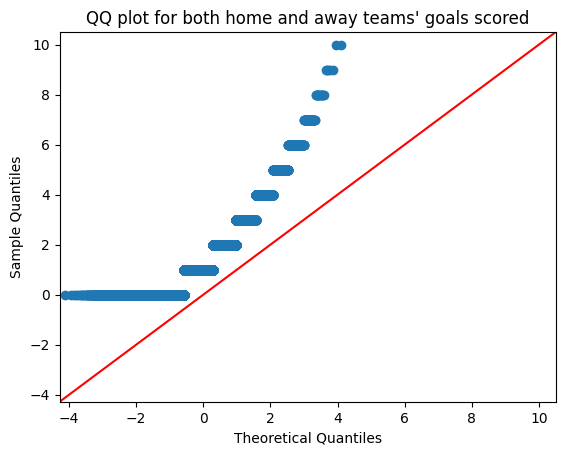

In [ ]:
combined_goals = pd.concat(
    [df_advantage["home_team_goal"], df_advantage["away_team_goal"]]
)

fig = sm.qqplot(combined_goals, line="45")
plt.title("QQ plot for both home and away teams' goals scored")
plt.show()

Even though our data is not normally distributed, we can still use t-test because we have large enough sample size.

Null Hypothesis (H0): The average number of goals scored by the home team is equal to or less than the average number of goals scored by the away team.


Alternative Hypothesis (H1): The average number of goals scored by the home team is significantly greater than the average number of goals scored by the away team.

H0: μ home_team_goals <= μ away_team_goals <br>
H1: μ home_team_goals > μ away_team_goals

Significance level: Significance level α = 95%

In [ ]:
import scipy.stats as stats

home_goals = df_advantage["home_team_goal"]
away_goals = df_advantage["away_team_goal"]

t_stat, p_value = stats.ttest_ind(home_goals, away_goals, alternative="greater")

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

T-Statistic: 35.779399930628294
P-Value: 2.7370047259060416e-277
Reject the null hypothesis.


 Home team scores significantly more goals than the away team.

## Predicting players overall score

In [ ]:
df_player_attrb_table = df_player_attrb.copy()

In [ ]:
def convert_to_season_year(df, date_column, season_start_month=8):
    df[date_column] = pd.to_datetime(df[date_column])

    df["season_year"] = df[date_column].apply(
        lambda x: str(x.year - 1) + "/" + str(x.year)
        if x.month < season_start_month
        else str(x.year) + "/" + str(x.year + 1)
    )

    return df

In [ ]:
df_player_attrb_table = convert_to_season_year(
    df_player_attrb_table, "date", season_start_month=8
)

In [ ]:
mapping = {"right": 0, "left": 1}

df_player_attrb_table["preferred_foot"] = df_player_attrb_table[
    "preferred_foot"
].replace(mapping)

In [ ]:
valid_work_rates = ["low", "medium", "high"]

df_player_attrb_table["defensive_work_rate"] = np.where(
    df_player_attrb_table["defensive_work_rate"].isin(valid_work_rates),
    df_player_attrb_table["defensive_work_rate"],
    np.nan,
)

In [ ]:
valid_work_rates = ["low", "medium", "high"]

df_player_attrb_table["attacking_work_rate"] = np.where(
    df_player_attrb_table["attacking_work_rate"].isin(valid_work_rates),
    df_player_attrb_table["attacking_work_rate"],
    np.nan,
)

In [ ]:
df_player_attrb_table.drop(["id", "date", "player_fifa_api_id"], axis=1, inplace=True)

In [ ]:
df_player_attrb_table = df_player_attrb_table.groupby(
    ["player_api_id", "season_year"]
).mean()

<ipython-input-127-d2077a80cea2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_player_attrb_table = df_player_attrb_table.groupby(['player_api_id', 'season_year']).mean()


In [ ]:
heatmap = df_player_attrb_table.copy()

In [ ]:
heatmap.reset_index(inplace=True)

In [ ]:
heatmap = heatmap.drop(columns=["player_api_id", "season_year"])

In [ ]:
correlation = heatmap.corr()["overall_rating"]

In [ ]:
correlation_matrix = correlation.to_frame()

<Axes: >

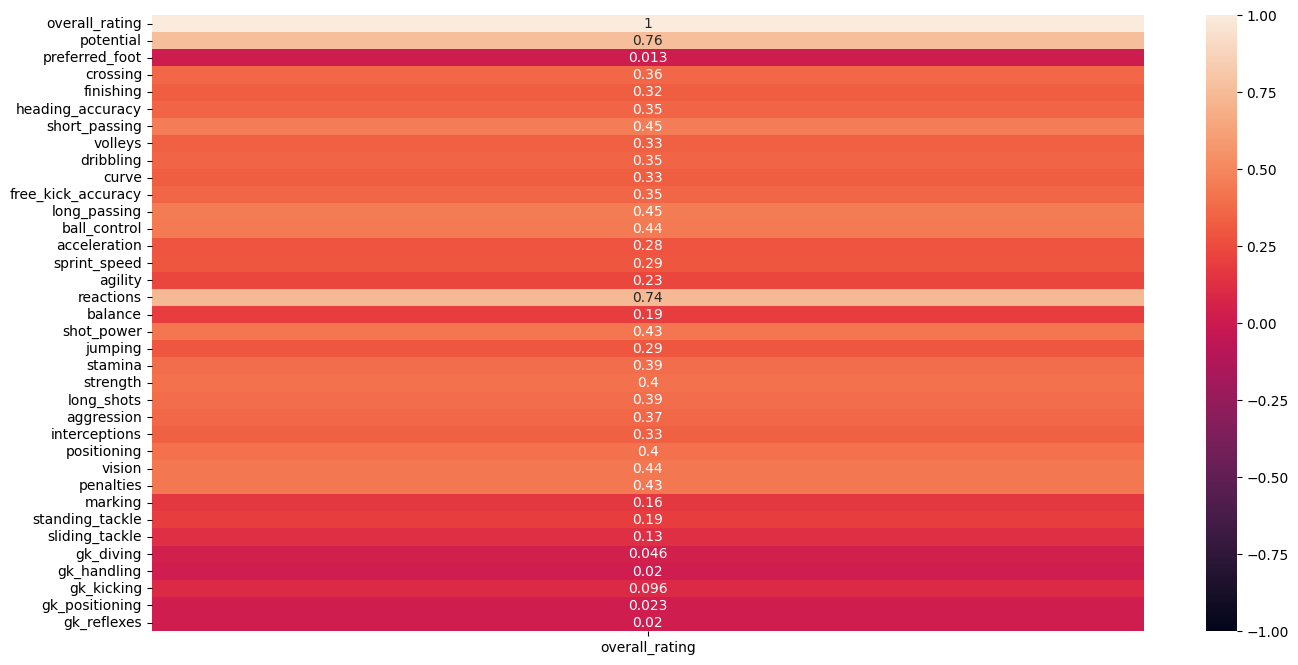

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)

Potential and reaction having the biggest correlation with overall rating, goalkeeping abilities has the lowest impact on overall rating.

Reactions (REA) is a Player Attribute in FIFA that determines the acting speed of a player in response to the situations happening around them.

Potential indicates a player's ability to develop into a better overall rating compared to their original overall rating at the start of your career.

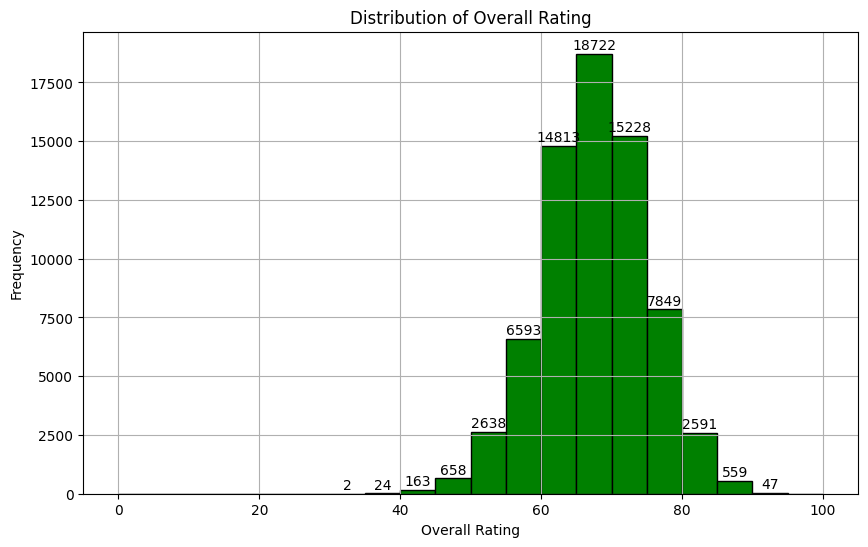

In [ ]:
hist_values, bins = np.histogram(heatmap["overall_rating"], bins=20, range=(0, 100))

plt.figure(figsize=(10, 6))
plt.hist(
    heatmap["overall_rating"], bins=20, range=(0, 100), color="green", edgecolor="black"
)
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Overall Rating")
plt.grid(True)

for i in range(len(hist_values)):
    if hist_values[i] > 0:
        plt.text(
            bins[i] + (bins[i + 1] - bins[i]) / 2,
            hist_values[i] + 50,
            f"{int(hist_values[i])}",
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
        )

plt.show()

Overall rating data seems to be normaly distributed

In [ ]:
df_player_attrb_table.reset_index(inplace=True)

In [ ]:
df_player_attrb_table.dropna(
    inplace=True
)  # Removing only 1518 rows from almost 70000 rows

### Linear Regression

In [ ]:
player_attrb_linreg = df_player_attrb_table.copy()

In [ ]:
player_attrb_linreg.drop(axis=1, labels=["player_api_id", "season_year"], inplace=True)

In [ ]:
features = [
    "potential",
    "preferred_foot",
    "crossing",
    "finishing",
    "heading_accuracy",
    "short_passing",
    "volleys",
    "dribbling",
    "curve",
    "free_kick_accuracy",
    "long_passing",
    "ball_control",
    "acceleration",
    "sprint_speed",
    "agility",
    "reactions",
    "balance",
    "shot_power",
    "jumping",
    "stamina",
    "strength",
    "long_shots",
    "aggression",
    "interceptions",
    "positioning",
    "vision",
    "penalties",
    "marking",
    "standing_tackle",
    "sliding_tackle",
    "gk_diving",
    "gk_handling",
    "gk_kicking",
    "gk_positioning",
    "gk_reflexes",
]
target = "overall_rating"

X = player_attrb_linreg[features]
y = player_attrb_linreg[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

R-squared (R²): 0.8414
Mean Squared Error (MSE): 9.0196


We have managed to get pretty high r^2 score, lets try to reduce the number of features for our model.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

               Feature         VIF
0                const  181.159508
1            potential    2.134412
2       preferred_foot    1.079061
3             crossing    4.791171
4            finishing    6.648774
5     heading_accuracy    4.138439
6        short_passing    7.700211
7              volleys    5.007367
8            dribbling    8.586901
9                curve    4.553031
10  free_kick_accuracy    3.335532
11        long_passing    3.452274
12        ball_control   11.732713
13        acceleration    6.626214
14        sprint_speed    5.856959
15             agility    3.405568
16           reactions    2.179481
17             balance    2.066136
18          shot_power    4.361339
19             jumping    1.543395
20             stamina    2.705653
21            strength    2.284656
22          long_shots    6.030237
23          aggression    2.783895
24       interceptions    3.528394
25         positioning    4.172036
26              vision    3.661584
27           penalti

Values were removed one by one until there were no features left with > 5 VIF, what is left is selected as features

In [ ]:
features = [
    "preferred_foot",
    "jumping",
    "gk_kicking",
    "potential",
    "balance",
    "reactions",
    "strength",
    "stamina",
    "aggression",
    "long_passing",
    "penalties",
    "sprint_speed",
    "free_kick_accuracy",
    "agility",
    "interceptions",
    "sliding_tackle",
    "shot_power",
    "vision",
    "heading_accuracy",
    "positioning",
    "volleys",
    "crossing",
    "curve",
    "gk_diving",
]

target = "overall_rating"

X = player_attrb_linreg[features]
y = player_attrb_linreg[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

R-squared (R²): 0.8243
Mean Squared Error (MSE): 9.9928


By removing many features that have high multicollinearity, we have managed to keep r^2 score very similar and did not lose much information, although MSE has increased by 0.98  

## Which leagues has the most talented players

Because we do not have a foreign key in data to combine teams and players, we will extract them from match data.

In [ ]:
df_match_data = df_match.copy()

league_season_team_data = {}

# Group the matches by league, season and team and extract the player IDs for each team
grouped = df_match_data.groupby(
    ["league_id", "season", "home_team_api_id", "away_team_api_id"]
)

for name, group in grouped:
    league_id, season, home_team_id, away_team_id = name

    home_player_ids = []
    for i in range(1, 12):
        column_name = f"home_player_{i}"
        home_player_ids += group[column_name].dropna().astype(int).tolist()
    home_player_ids = sorted(list(set(home_player_ids)))

    away_player_ids = []
    for i in range(1, 12):
        column_name = f"away_player_{i}"
        away_player_ids += group[column_name].dropna().astype(int).tolist()
    away_player_ids = sorted(list(set(away_player_ids)))

    if league_id not in league_season_team_data:
        league_season_team_data[league_id] = {}
    if season not in league_season_team_data[league_id]:
        league_season_team_data[league_id][season] = {}
    league_season_team_data[league_id][season][home_team_id] = home_player_ids
    league_season_team_data[league_id][season][away_team_id] = away_player_ids

In [ ]:
results = []

# Loop over the dictionary and extract the league ID, season, team ID and player IDs
for league_id, season_data in league_season_team_data.items():
    for season, team_data in season_data.items():
        for team_id, player_ids in team_data.items():
            result = {
                "league_id": league_id,
                "season": season,
                "team_id": team_id,
                "player_ids": player_ids,
            }
            results.append(result)

df = pd.DataFrame(results)

In [ ]:
df_team_players_16 = df.loc[(df.season == "2015/2016")]

In [ ]:
df_exploded = df_team_players_16.explode("player_ids")

grouped_data = df_exploded.groupby("league_id")["player_ids"].agg(list)

grouped_data = grouped_data.apply(lambda x: ", ".join(map(str, x)))

grouped_data = grouped_data.reset_index()

In [ ]:
exploded_data = grouped_data.assign(
    player_ids=grouped_data["player_ids"].str.split(", ")
).explode("player_ids")

exploded_data["player_ids"] = exploded_data["player_ids"].astype(int)

exploded_data.reset_index(drop=True, inplace=True)

In [ ]:
merged_data = exploded_data.merge(
    df_player_attrb_table[(df_player_attrb_table["season_year"] == "2015/2016")],
    left_on="player_ids",
    right_on="player_api_id",
    how="left",
)


exploded_data["overall_rating"] = merged_data["overall_rating"]

In [ ]:
exploded_data = exploded_data.merge(
    df_league, how="left", left_on="league_id", right_on="id"
)

In [ ]:
exploded_data = exploded_data.merge(df_country, how="left", on="country_id")

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(
    data_frame=exploded_data, x="overall_rating", color="league", facet_col="country"
)


fig.update_layout(
    title="Distribution of Overall Ratings by League",
    xaxis_title="Overall Rating",
    yaxis_title="Frequency",
    showlegend=True,
    barmode="relative",
)


fig.show()

From histograms, we can see that most right skewed data of overall rating is on England, France, Germany, Italy and Spain. These leagues has the most talented players. (zoom in by selecting with click and drag from point x=80;y=5 to x=100;y=0)

## Predicting end of season points for teams

### Bundesliga table

We will create bundesliga tournament table from our match data

In [ ]:
df_bundesliga_games = df_match.loc[
    (df_match.league_id == 7809) & (df_match.season == "2008/2009")
]

In [ ]:
def calculate_points_result_games(row):
    if row["home_team_goal"] > row["away_team_goal"]:
        return 3, "win", 1
    elif row["home_team_goal"] == row["away_team_goal"]:
        return 1, "draw", 1
    else:
        return 0, "loss", 1

In [ ]:
(
    df_bundesliga_games["home_points"],
    df_bundesliga_games["home_result"],
    df_bundesliga_games["home_games_played"],
) = zip(
    *df_bundesliga_games.apply(lambda row: calculate_points_result_games(row), axis=1)
)
(
    df_bundesliga_games["away_points"],
    df_bundesliga_games["away_result"],
    df_bundesliga_games["away_games_played"],
) = zip(
    *df_bundesliga_games.apply(
        lambda row: (
            3 - calculate_points_result_games(row)[0],
            "win"
            if calculate_points_result_games(row)[1] == "loss"
            else "loss"
            if calculate_points_result_games(row)[1] == "win"
            else "draw",
            1,
        ),
        axis=1,
    )
)


standings = pd.DataFrame(
    columns=[
        "season",
        "team_api_id",
        "points",
        "wins",
        "draws",
        "losses",
        "games_played",
    ]
)


for season in df_bundesliga_games[
    "season"
].unique():  # Creating tournament table for each season
    for team_id in df_bundesliga_games[
        "home_team_api_id"
    ].unique():  # Creating columns of tournament table for each team
        total_points = df_bundesliga_games[
            (df_bundesliga_games["season"] == season)
            & (
                (df_bundesliga_games["home_team_api_id"] == team_id)
                | (df_bundesliga_games["away_team_api_id"] == team_id)
            )
        ]["home_points"].sum()
        total_wins = (
            df_bundesliga_games[
                (df_bundesliga_games["season"] == season)
                & (
                    (df_bundesliga_games["home_team_api_id"] == team_id)
                    | (df_bundesliga_games["away_team_api_id"] == team_id)
                )
            ]["home_result"]
            .apply(lambda x: 1 if x == "win" else 0)
            .sum()
        )
        total_draws = (
            df_bundesliga_games[
                (df_bundesliga_games["season"] == season)
                & (
                    (df_bundesliga_games["home_team_api_id"] == team_id)
                    | (df_bundesliga_games["away_team_api_id"] == team_id)
                )
            ]["home_result"]
            .apply(lambda x: 1 if x == "draw" else 0)
            .sum()
        )
        total_losses = (
            df_bundesliga_games[
                (df_bundesliga_games["season"] == season)
                & (
                    (df_bundesliga_games["home_team_api_id"] == team_id)
                    | (df_bundesliga_games["away_team_api_id"] == team_id)
                )
            ]["home_result"]
            .apply(lambda x: 1 if x == "loss" else 0)
            .sum()
        )
        total_games_played = df_bundesliga_games[
            (df_bundesliga_games["season"] == season)
            & (
                (df_bundesliga_games["home_team_api_id"] == team_id)
                | (df_bundesliga_games["away_team_api_id"] == team_id)
            )
        ]["home_games_played"].sum()

        standings = standings.append(
            {
                "season": season,
                "team_api_id": team_id,
                "points": total_points,
                "wins": total_wins,
                "draws": total_draws,
                "losses": total_losses,
                "games_played": total_games_played,
            },
            ignore_index=True,
        )


standings.sort_values(by=["season", "points"], ascending=[True, False], inplace=True)
standings["place"] = standings.groupby("season").cumcount() + 1

In [ ]:
standings = standings.merge(df_team[["team_long_name", "team_api_id"]], how="left")

In [ ]:
standings

,season,team_api_id,points,wins,draws,losses,games_played,place,team_long_name
0,2008/2009,8721,75,23,6,5,34,1,VfL Wolfsburg
1,2008/2009,9790,70,22,4,8,34,2,Hamburger SV
2,2008/2009,9904,70,20,10,4,34,3,Hannover 96
3,2008/2009,8697,69,20,9,5,34,4,SV Werder Bremen
4,2008/2009,8177,63,19,6,9,34,5,Hertha BSC Berlin
5,2008/2009,10269,61,18,7,9,34,6,VfB Stuttgart
6,2008/2009,8295,59,18,5,11,34,7,Karlsruher SC
7,2008/2009,10189,56,16,8,10,34,8,FC Schalke 04
8,2008/2009,9823,55,16,7,11,34,9,FC Bayern Munich
9,2008/2009,9788,55,16,7,11,34,10,Borussia Mönchengladbach


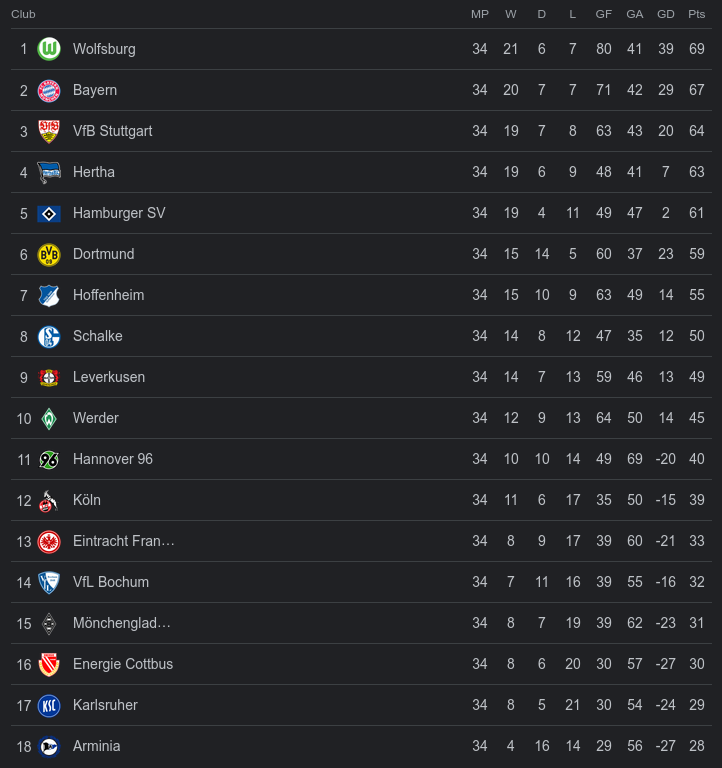

Table from our data and table from the internet for 2008/2009 and other seasons do not match, lets try looking at each individual match.

In [ ]:
test = df_match.loc[
    (df_match["home_team_api_id"] == 9823)
    | (df_match["away_team_api_id"] == 9823) & (df_match["season"] == "2015/2016")
]

In [ ]:
test = test[
    ["home_team_api_id", "away_team_api_id", "home_team_goal", "away_team_goal", "date"]
]

In [ ]:
test = test.merge(
    df_team[["team_api_id", "team_long_name"]],
    left_on="home_team_api_id",
    right_on="team_api_id",
    how="left",
)
test = test.rename(columns={"team_long_name": "home_team_long_name"})
test.drop(columns="team_api_id", inplace=True)

test = test.merge(
    df_team[["team_api_id", "team_long_name"]],
    left_on="away_team_api_id",
    right_on="team_api_id",
    how="left",
)
test = test.rename(columns={"team_long_name": "away_team_long_name"})
test.drop(columns="team_api_id", inplace=True)

In [ ]:
test.head()

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,date,home_team_long_name,away_team_long_name
0,9823,9790,2,2,2008-08-15 00:00:00,FC Bayern Munich,Hamburger SV
1,9823,9912,3,1,2008-11-01 00:00:00,FC Bayern Munich,DSC Arminia Bielefeld
2,9823,8398,4,1,2008-11-22 00:00:00,FC Bayern Munich,FC Energie Cottbus
3,9823,8226,2,1,2008-12-05 00:00:00,FC Bayern Munich,TSG 1899 Hoffenheim
4,9823,9789,3,1,2009-02-08 00:00:00,FC Bayern Munich,Borussia Dortmund


By comparing Bundesliga (and Premier league, code not included) games data from our dataset with data of matches from the internet, most of the games and scores do not match, this means that games data from our dataset is incorrect. Data of matches from internet as an example: https://www.transfermarkt.com/bundesliga/spieltag/wettbewerb/L1/plus/?saison_id=2008&spieltag=1

For this reason, lets import tables of Bundesliga from the internet. We will choose team name as a key to match it with our team attributes data.

In [ ]:
teamnames = df_match[df_match["league_id"] == 7809]

In [ ]:
unique_home_team_ids = teamnames["home_team_api_id"].unique()
teams = pd.DataFrame({"home_team_api_id": unique_home_team_ids})

In [ ]:
teams = teams.merge(
    df_team[["team_api_id", "team_long_name"]],
    left_on="home_team_api_id",
    right_on="team_api_id",
    how="left",
)

In [ ]:
bundesliga = pd.read_csv("/content/drive/MyDrive/DataFiles/bundesleague - Sheet1.csv")

In [ ]:
mapping = {
    "Bayern Munich": "FC Bayern Munich",
    "Bor. M'gladbach": "Borussia Mönchengladbach",
    "B. Leverkusen": "Bayer 04 Leverkusen",
    "Bor. Dortmund": "Borussia Dortmund",
    "TSG Hoffenheim": "TSG 1899 Hoffenheim",
    "Werder Bremen": "SV Werder Bremen",
    "E. Frankfurt": "Eintracht Frankfurt",
    "1.FSV Mainz 05": "1. FSV Mainz 05",
    "1.FC Köln": "1. FC Köln",
    "Hertha BSC 6": "Hertha BSC Berlin",
    "Hertha BSC": "Hertha BSC Berlin",
    "Arm. Bielefeld": "DSC Arminia Bielefeld",
    "Karlsruher SC": "Karlsruher SC",
    "freiburg": "SC Freiburg",
    "1.FC Nuremberg": "1. FC Nürnberg",
    "SC Paderborn": "SC Paderborn 07",
    "1.FC K'lautern": "1. FC Kaiserslautern",
    "E. Braunschweig": "Eintracht Braunschweig",
    "F. Düsseldorf": "Fortuna Düsseldorf",
    "Greuther Fürth": "SpVgg Greuther Fürth",
    "Energie Cottbus": "FC Energie Cottbus",
}

bundesliga["team_name"] = bundesliga["team_name"].replace(mapping)

In [ ]:
unique_bundesliga_id = bundesliga["team_name"].unique()
new_name = pd.DataFrame({"team_name_new": unique_bundesliga_id})

In [ ]:
bundesliga_attrb = df_team_attrb.copy()

In [ ]:
bundesliga_attrb["date"] = pd.to_datetime(bundesliga_attrb["date"], format="%Y-%m-%d")

In [ ]:
bundesliga_attrb = bundesliga_attrb.drop(["team_fifa_api_id", "id"], axis=1)

In [ ]:
# date column has only 2 months - february and september


def convert_date(row):
    date = pd.to_datetime(row["date"])
    if date.month == 9:
        return f"{date.year}/{date.year + 1}"
    elif date.month == 2:
        return f"{date.year - 1}/{date.year}"
    else:
        return date.strftime("%Y-%m-%d")


bundesliga_attrb["date"] = bundesliga_attrb.apply(convert_date, axis=1)

In [ ]:
bundesliga_tables = bundesliga_attrb.merge(
    df_team[["team_api_id", "team_long_name"]], on="team_api_id", how="left"
)

In [ ]:
bundesliga_tables = bundesliga_tables.rename(columns={"date": "season"})
bundesliga_tables = bundesliga_tables.rename(columns={"team_long_name": "team_name"})

In [ ]:
bundesliga_tables["team_name"] = bundesliga_tables["team_name"].astype(str)
bundesliga_tables["season"] = bundesliga_tables["season"].astype(str)
bundesliga["team_name"] = bundesliga["team_name"].astype(str)
bundesliga["season"] = bundesliga["season"].astype(str)

In [ ]:
selected_columns = ["season", "team_name", "Pts"]
bundesliga_selected = bundesliga[selected_columns]

bundesliga_tables = bundesliga_selected.merge(
    bundesliga_tables, on=["team_name", "season"], how="left"
)

2008/2009 and 2012/2013 seasons are missing from our team attribute data

Data cleaning and preperation

In [ ]:
bundesliga_tables = bundesliga_tables.drop(
    columns=["buildUpPlayDribbling"]
)  # most of the values are Na
bundesliga_tables = bundesliga_tables[
    ~bundesliga_tables["season"].isin(["2008/2009", "2012/2013"])
]  # for both of these seasons team attribute data is missing (from EDA)

In [ ]:
bundesliga_tables["buildUpPlaySpeedClass"] = bundesliga_tables[
    "buildUpPlaySpeedClass"
].replace({"Slow": 0, "Fast": 2, "Balanced": 1})
bundesliga_tables["buildUpPlayDribblingClass"] = bundesliga_tables[
    "buildUpPlayDribblingClass"
].replace({"Little": 0, "Normal": 1, "Lots": 2})
bundesliga_tables["buildUpPlayPassingClass"] = bundesliga_tables[
    "buildUpPlayPassingClass"
].replace({"Short": 0, "Mixed": 1, "Long": 2})
bundesliga_tables["buildUpPlayPositioningClass"] = bundesliga_tables[
    "buildUpPlayPositioningClass"
].replace({"Organised": 0, "Free Form": 1})
bundesliga_tables["chanceCreationPassingClass"] = bundesliga_tables[
    "chanceCreationPassingClass"
].replace({"Safe": 0, "Normal": 1, "Risky": 2})
bundesliga_tables["chanceCreationCrossingClass"] = bundesliga_tables[
    "chanceCreationCrossingClass"
].replace({"Little": 0, "Normal": 1, "Lots": 2})
bundesliga_tables["chanceCreationPositioningClass"] = bundesliga_tables[
    "chanceCreationPositioningClass"
].replace({"Organised": 0, "Free Form": 1})
bundesliga_tables["defencePressureClass"] = bundesliga_tables[
    "defencePressureClass"
].replace({"Deep": 0, "Medium": 1, "High": 2})
bundesliga_tables["defenceTeamWidthClass"] = bundesliga_tables[
    "defenceTeamWidthClass"
].replace({"Narrow": 0, "Normal": 1, "Wide": 2})
bundesliga_tables["chanceCreationShootingClass"] = bundesliga_tables[
    "chanceCreationShootingClass"
].replace({"Little": 0, "Normal": 1, "Lots": 2})
bundesliga_tables["defenceTeamWidthClass"] = bundesliga_tables[
    "defenceTeamWidthClass"
].replace({"Narrow": 0, "Normal": 1, "Wide": 2})
bundesliga_tables["defenceAggressionClass"] = bundesliga_tables[
    "defenceAggressionClass"
].replace({"Contain": 0, "Press": 1, "Double": 2})
bundesliga_tables["defenceDefenderLineClass"] = bundesliga_tables[
    "defenceDefenderLineClass"
].replace({"Offside Trap": 0, "Cover": 1})

In [ ]:
bundesliga_tables.sort_values(["season", "Pts"], ascending=[True, False], inplace=True)

bundesliga_tables["place"] = bundesliga_tables.groupby("season").cumcount() + 1

In [ ]:
season_mapping = {
    "2009/2010": 0,
    "2010/2011": 1,
    "2011/2012": 2,
    "2013/2014": 3,
    "2014/2015": 4,
    "2015/2016": 5,
}

bundesliga_tables["season"] = bundesliga_tables["season"].map(season_mapping)

### 4 Leagues table

Eventhough we know that our match data is somewhat incorrect, we will try creating tournament tables for 4 leagues and each season for our linear regression model since we do not care about entity-specific fixed or time effects and we can use as much data as possible.

From out EDA we have learned that German, England, Spanish and French leagues has least data missing and their team attributes are only missing from 2 seasons.

In [ ]:
four_leagues = df_match.copy()

In [ ]:
import pandas as pd

four_leagues = df_match.copy()

(
    four_leagues["home_points"],
    four_leagues["home_result"],
    four_leagues["home_games_played"],
) = zip(*four_leagues.apply(lambda row: calculate_points_result_games(row), axis=1))
(
    four_leagues["away_points"],
    four_leagues["away_result"],
    four_leagues["away_games_played"],
) = zip(
    *four_leagues.apply(
        lambda row: (
            3 - calculate_points_result_games(row)[0],
            "win"
            if calculate_points_result_games(row)[1] == "loss"
            else "loss"
            if calculate_points_result_games(row)[1] == "win"
            else "draw",
            1,
        ),
        axis=1,
    )
)

selected_leagues = [7809, 1729, 4769, 21518]
four_leagues = four_leagues[four_leagues["league_id"].isin(selected_leagues)]

tournament_tables = pd.DataFrame(
    columns=[
        "season",
        "team_api_id",
        "points",
        "wins",
        "draws",
        "losses",
        "goals_scored",
        "goals_conceded",
        "games_played",
        "league_id",
    ]
)

for league_id in selected_leagues:
    league_data = four_leagues[four_leagues["league_id"] == league_id]

    for season in league_data["season"].unique():
        for team_id in league_data["home_team_api_id"].unique():
            total_wins = (
                league_data[
                    (league_data["season"] == season)
                    & (
                        (league_data["home_team_api_id"] == team_id)
                        | (league_data["away_team_api_id"] == team_id)
                    )
                ]["home_result"]
                .apply(lambda x: 1 if x == "win" else 0)
                .sum()
            )
            total_draws = (
                league_data[
                    (league_data["season"] == season)
                    & (
                        (league_data["home_team_api_id"] == team_id)
                        | (league_data["away_team_api_id"] == team_id)
                    )
                ]["home_result"]
                .apply(lambda x: 1 if x == "draw" else 0)
                .sum()
            )
            total_losses = (
                league_data[
                    (league_data["season"] == season)
                    & (
                        (league_data["home_team_api_id"] == team_id)
                        | (league_data["away_team_api_id"] == team_id)
                    )
                ]["home_result"]
                .apply(lambda x: 1 if x == "loss" else 0)
                .sum()
            )

            total_points = 3 * total_wins + total_draws
            total_goals_scored = league_data[
                (league_data["season"] == season)
                & (
                    (league_data["home_team_api_id"] == team_id)
                    | (league_data["away_team_api_id"] == team_id)
                )
            ]["home_team_goal"].sum()
            total_goals_conceded = league_data[
                (league_data["season"] == season)
                & (
                    (league_data["home_team_api_id"] == team_id)
                    | (league_data["away_team_api_id"] == team_id)
                )
            ]["away_team_goal"].sum()

            total_games_played = league_data[
                (league_data["season"] == season)
                & (
                    (league_data["home_team_api_id"] == team_id)
                    | (league_data["away_team_api_id"] == team_id)
                )
            ]["home_games_played"].sum()

            tournament_tables = tournament_tables.append(
                {
                    "season": season,
                    "team_api_id": team_id,
                    "points": total_points,
                    "wins": total_wins,
                    "draws": total_draws,
                    "losses": total_losses,
                    "goals_scored": total_goals_scored,
                    "goals_conceded": total_goals_conceded,
                    "games_played": total_games_played,
                    "league_id": league_id,
                },
                ignore_index=True,
            )

tournament_tables.sort_values(
    by=["league_id", "season", "points"], ascending=[True, True, False], inplace=True
)
tournament_tables["place"] = (
    tournament_tables.groupby(["league_id", "season"]).cumcount() + 1
)

In [ ]:
tournament_tables = tournament_tables[tournament_tables["games_played"] != 0]

In [ ]:
leagues_tables = tournament_tables.copy()

In [ ]:
leagues_attrb = df_team_attrb.copy()
leagues_attrb["date"] = pd.to_datetime(leagues_attrb["date"], format="%Y-%m-%d")
leagues_attrb = leagues_attrb.drop(["team_fifa_api_id", "id"], axis=1)


def convert_date(row):
    date = pd.to_datetime(row["date"])
    if date.month == 9:
        return f"{date.year}/{date.year + 1}"
    elif date.month == 2:
        return f"{date.year - 1}/{date.year}"
    else:
        return date.strftime("%Y-%m-%d")


leagues_attrb["date"] = leagues_attrb.apply(convert_date, axis=1)

In [ ]:
leagues_attrb = leagues_attrb.merge(
    df_team[["team_api_id", "team_long_name"]], on="team_api_id", how="left"
)
leagues_attrb = leagues_attrb.rename(columns={"date": "season"})
leagues_attrb = leagues_attrb.rename(columns={"team_long_name": "team_name"})

In [ ]:
leagues_attrb = leagues_tables.merge(
    leagues_attrb, on=["team_api_id", "season"], how="left"
)

In [ ]:
leagues_attrb = leagues_attrb.drop(
    columns=["buildUpPlayDribbling"]
)  # most of the values are Na
leagues_attrb = leagues_attrb[
    ~leagues_attrb["season"].isin(["2008/2009", "2012/2013"])
]  # for both of these seasons team attribute data is missing

In [ ]:
leagues_attrb["points"] = leagues_attrb["points"].astype(int)

In [ ]:
leagues_attrb["buildUpPlaySpeedClass"] = leagues_attrb["buildUpPlaySpeedClass"].replace(
    {"Slow": 0, "Fast": 2, "Balanced": 1}
)
leagues_attrb["buildUpPlayDribblingClass"] = leagues_attrb[
    "buildUpPlayDribblingClass"
].replace({"Little": 0, "Normal": 1, "Lots": 2})
leagues_attrb["buildUpPlayPassingClass"] = leagues_attrb[
    "buildUpPlayPassingClass"
].replace({"Short": 0, "Mixed": 1, "Long": 2})
leagues_attrb["buildUpPlayPositioningClass"] = leagues_attrb[
    "buildUpPlayPositioningClass"
].replace({"Organised": 0, "Free Form": 1})
leagues_attrb["chanceCreationPassingClass"] = leagues_attrb[
    "chanceCreationPassingClass"
].replace({"Safe": 0, "Normal": 1, "Risky": 2})
leagues_attrb["chanceCreationCrossingClass"] = leagues_attrb[
    "chanceCreationCrossingClass"
].replace({"Little": 0, "Normal": 1, "Lots": 2})
leagues_attrb["chanceCreationPositioningClass"] = leagues_attrb[
    "chanceCreationPositioningClass"
].replace({"Organised": 0, "Free Form": 1})
leagues_attrb["defencePressureClass"] = leagues_attrb["defencePressureClass"].replace(
    {"Deep": 0, "Medium": 1, "High": 2}
)
leagues_attrb["defenceTeamWidthClass"] = leagues_attrb["defenceTeamWidthClass"].replace(
    {"Narrow": 0, "Normal": 1, "Wide": 2}
)
leagues_attrb["chanceCreationShootingClass"] = leagues_attrb[
    "chanceCreationShootingClass"
].replace({"Little": 0, "Normal": 1, "Lots": 2})
leagues_attrb["defenceTeamWidthClass"] = leagues_attrb["defenceTeamWidthClass"].replace(
    {"Narrow": 0, "Normal": 1, "Wide": 2}
)
leagues_attrb["defenceAggressionClass"] = leagues_attrb[
    "defenceAggressionClass"
].replace({"Contain": 0, "Press": 1, "Double": 2})
leagues_attrb["defenceDefenderLineClass"] = leagues_attrb[
    "defenceDefenderLineClass"
].replace({"Offside Trap": 0, "Cover": 1})

### Model

We will create couple linear regression models to predict end of season Pts for each team

#### Linear regression predicting Pts with team attributes only for bundesliga

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
dependent_variable = "Pts"
independent_variables = [
    "buildUpPlaySpeed",
    "buildUpPlaySpeedClass",
    "buildUpPlayDribblingClass",
    "buildUpPlayPassing",
    "buildUpPlayPassingClass",
    "buildUpPlayPositioningClass",
    "chanceCreationPassing",
    "chanceCreationPassingClass",
    "chanceCreationCrossing",
    "chanceCreationCrossingClass",
    "chanceCreationShooting",
    "chanceCreationShootingClass",
    "chanceCreationPositioningClass",
    "defencePressure",
    "defencePressureClass",
    "defenceAggression",
    "defenceAggressionClass",
    "defenceTeamWidth",
    "defenceTeamWidthClass",
    "defenceDefenderLineClass",
]

formula = f"{dependent_variable} ~ {' + '.join(independent_variables)}"

model = sm.OLS.from_formula(formula, data=bundesliga_tables)
results = model.fit()

X_train, X_test, y_train, y_test = train_test_split(
    bundesliga_tables[independent_variables],
    bundesliga_tables[dependent_variable],
    test_size=0.2,
    random_state=42,
)

y_pred = results.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Set Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Test Set Evaluation:
Mean Squared Error: 101.9530096277124
R-squared: 0.42514845456881634


In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     3.886
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           5.22e-06
Time:                        21:26:15   Log-Likelihood:                -406.06
No. Observations:                 108   AIC:                             854.1
Df Residuals:                      87   BIC:                             910.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

independent_variables = [
    "buildUpPlaySpeed",
    "buildUpPlaySpeedClass",
    "buildUpPlayDribblingClass",
    "buildUpPlayPassing",
    "buildUpPlayPassingClass",
    "buildUpPlayPositioningClass",
    "chanceCreationPassing",
    "chanceCreationPassingClass",
    "chanceCreationCrossing",
    "chanceCreationCrossingClass",
    "chanceCreationShooting",
    "chanceCreationShootingClass",
    "chanceCreationPositioningClass",
    "defencePressure",
    "defencePressureClass",
    "defenceAggression",
    "defenceAggressionClass",
    "defenceTeamWidth",
    "defenceTeamWidthClass",
    "defenceDefenderLineClass",
]

X = bundesliga_tables[independent_variables]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)

print(vif)

                          Variable        VIF
0                 buildUpPlaySpeed  88.401981
10          chanceCreationShooting  71.899231
6            chanceCreationPassing  65.355463
15               defenceAggression  64.224420
13                 defencePressure  62.892082
17                defenceTeamWidth  56.630602
8           chanceCreationCrossing  55.386106
3               buildUpPlayPassing  49.769853
19        defenceDefenderLineClass  46.992203
18           defenceTeamWidthClass  30.403794
16          defenceAggressionClass  24.704419
11     chanceCreationShootingClass  23.734571
7       chanceCreationPassingClass  22.408475
1            buildUpPlaySpeedClass  22.187771
14            defencePressureClass  20.316593
9      chanceCreationCrossingClass  19.700576
4          buildUpPlayPassingClass  17.490442
12  chanceCreationPositioningClass   2.062608
5      buildUpPlayPositioningClass   1.837346
2        buildUpPlayDribblingClass   1.747456


We will remove features based on coeficients, p values, or similar data like 'chanceCreationPassingClass' and 'chanceCreationPassing'

In [ ]:
dependent_variable = "Pts"
independent_variables = [
    "buildUpPlaySpeedClass",
    "buildUpPlayDribblingClass",
    "buildUpPlayPassingClass",
    "buildUpPlayPositioningClass",
    "chanceCreationCrossingClass",
    "chanceCreationShootingClass",
    "chanceCreationPositioningClass",
    "defenceAggressionClass",
]

formula = f"{dependent_variable} ~ {' + '.join(independent_variables)}"

model_pooled = sm.OLS.from_formula(formula, data=bundesliga_tables)
results = model_pooled.fit()

X_train, X_test, y_train, y_test = train_test_split(
    bundesliga_tables[independent_variables],
    bundesliga_tables[dependent_variable],
    test_size=0.2,
    random_state=42,
)

y_pred = results.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest Set Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Test Set Evaluation:
Mean Squared Error: 104.95208253414127
R-squared: 0.4082384908373209


By removing many features our r^2 droped only by about 0.2

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     4.425
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           0.000132
Time:                        21:26:15   Log-Likelihood:                -424.03
No. Observations:                 108   AIC:                             866.1
Df Residuals:                      99   BIC:                             890.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
independent_variables = [
    "buildUpPlaySpeedClass",
    "buildUpPlayDribblingClass",
    "buildUpPlayPassingClass",
    "buildUpPlayPositioningClass",
    "chanceCreationCrossingClass",
    "chanceCreationShootingClass",
    "chanceCreationPositioningClass",
    "defenceAggressionClass",
]

X = bundesliga_tables[independent_variables]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)

print(vif)

                         Variable        VIF
7          defenceAggressionClass  10.631887
5     chanceCreationShootingClass  10.284266
0           buildUpPlaySpeedClass   8.964137
4     chanceCreationCrossingClass   8.537134
2         buildUpPlayPassingClass   6.706980
6  chanceCreationPositioningClass   1.848937
1       buildUpPlayDribblingClass   1.395837
3     buildUpPlayPositioningClass   1.328323


#### Linear regression predicting Pts with team attributes only for 4 different leagues

In [ ]:
dependent_variable = "points"
independent_variables = [
    "buildUpPlaySpeed",
    "buildUpPlaySpeedClass",
    "buildUpPlayDribblingClass",
    "buildUpPlayPassing",
    "buildUpPlayPassingClass",
    "buildUpPlayPositioningClass",
    "chanceCreationPassing",
    "chanceCreationPassingClass",
    "chanceCreationCrossing",
    "chanceCreationCrossingClass",
    "chanceCreationShooting",
    "chanceCreationShootingClass",
    "chanceCreationPositioningClass",
    "defencePressure",
    "defencePressureClass",
    "defenceAggression",
    "defenceAggressionClass",
    "defenceTeamWidth",
    "defenceTeamWidthClass",
    "defenceDefenderLineClass",
]

formula = f"{dependent_variable} ~ {' + '.join(independent_variables)}"

X = leagues_attrb[independent_variables]
y = leagues_attrb[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)
results_train = model.fit()

X_test = sm.add_constant(X_test)

y_pred = results_train.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest Set Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Test Set Evaluation:
Mean Squared Error: 57.90766771386603
R-squared: -0.04204271837801565


In [ ]:
print(results_train.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.403
Date:                Tue, 26 Dec 2023   Prob (F-statistic):              0.117
Time:                        21:26:15   Log-Likelihood:                -1309.8
No. Observations:                 374   AIC:                             2662.
Df Residuals:                     353   BIC:                             2744.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])
]
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print("VIF Analysis:")
print(vif_data)

VIF Analysis:
                          Variable         VIF
0                            const  178.376988
4               buildUpPlayPassing    2.662078
14                 defencePressure    2.625228
5          buildUpPlayPassingClass    2.588987
1                 buildUpPlaySpeed    2.519489
10     chanceCreationCrossingClass    2.492844
2            buildUpPlaySpeedClass    2.441864
9           chanceCreationCrossing    2.390423
7            chanceCreationPassing    2.351071
15            defencePressureClass    2.341067
12     chanceCreationShootingClass    2.294226
11          chanceCreationShooting    2.182733
8       chanceCreationPassingClass    2.179964
19           defenceTeamWidthClass    2.130443
16               defenceAggression    2.083945
18                defenceTeamWidth    2.075916
17          defenceAggressionClass    1.959796
13  chanceCreationPositioningClass    1.572635
6      buildUpPlayPositioningClass    1.544492
20        defenceDefenderLineClass    1.269246


Results show that a linear regression model trained on our match data from 4 different leagues performs way worse than a model trained on correct tournament table data from a single league. This could have happened because of 2 things:

*   Match dataframe is very far off from real data
*   Teams attributes might exhibit a statistically significant difference across various leagues. (Will do further analysis on that)


#### Linear regression predicting Pts with team attributes and teams (entity specific)

We will try using same features as with our first model and add teams as dummy values

In [ ]:
entity_dummies = pd.get_dummies(bundesliga_tables["team_name"], drop_first=True)

data_with_dummies = pd.concat([bundesliga_tables, entity_dummies], axis=1)

X = data_with_dummies[
    [
        "buildUpPlaySpeed",
        "buildUpPlayDribblingClass",
        "buildUpPlayPassingClass",
        "buildUpPlayPositioningClass",
        "chanceCreationPassingClass",
        "chanceCreationCrossingClass",
        "chanceCreationShootingClass",
        "chanceCreationPositioningClass",
        "defencePressureClass",
        "defenceAggressionClass",
        "defenceTeamWidthClass",
        "defenceDefenderLineClass",
    ]
    + entity_dummies.columns.tolist()[1:]
]  # Adding teams as dummy values
y = data_with_dummies["Pts"]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_fixed = sm.OLS(y_train, X_train)
results = model_fixed.fit()

print("\nTest Set Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

print(results.summary())

y_pred = results.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


Test Set Evaluation:
Mean Squared Error: 57.90766771386603
R-squared: -0.04204271837801565
                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     3.733
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           1.12e-05
Time:                        21:26:15   Log-Likelihood:                -298.43
No. Observations:                  86   AIC:                             666.9
Df Residuals:                      51   BIC:                             752.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])
]


print("VIF Analysis:")
print(vif_data)

VIF Analysis:
                          Variable       VIF
0                            const  0.000000
1                 buildUpPlaySpeed  2.279955
2        buildUpPlayDribblingClass  1.404392
3          buildUpPlayPassingClass  2.137933
4      buildUpPlayPositioningClass  2.835674
5       chanceCreationPassingClass  2.860258
6      chanceCreationCrossingClass  2.087062
7      chanceCreationShootingClass  2.201690
8   chanceCreationPositioningClass  2.974475
9             defencePressureClass  3.240250
10          defenceAggressionClass  1.937717
11           defenceTeamWidthClass  1.911855
12        defenceDefenderLineClass  0.000000
13                  1. FC Nürnberg  1.681289
14                 1. FSV Mainz 05  2.186640
15             Bayer 04 Leverkusen  2.670507
16               Borussia Dortmund  3.200378
17        Borussia Mönchengladbach  3.058303
18          Eintracht Braunschweig  1.634683
19             Eintracht Frankfurt  1.849041
20                     FC Augsburg  1.630

Having mse of over a 100 for predicting points is not good, although r^2 of 0.4 is reasonable. Since p values of team attributes are high, lets try removing them and leaving only the teams as features.

We will also add a time effect (season)

In [ ]:
entity_dummies = pd.get_dummies(bundesliga_tables["team_name"], drop_first=True)

time_dummies = pd.get_dummies(bundesliga_tables["season"], drop_first=True)

data_with_dummies = pd.concat([bundesliga_tables, entity_dummies, time_dummies], axis=1)

X = data_with_dummies[
    entity_dummies.columns.tolist()[1:] + time_dummies.columns.tolist()[2:]
]
y = data_with_dummies["Pts"]

X_season_5 = X[X[5] == 1]
y_season_5 = y[X[5] == 1]

teams_season_5 = bundesliga_tables[bundesliga_tables["season"] == 5][
    "team_name"
].unique()

# Split the data into a training set (teams present in seasons 1-4) and a test set (teams present in season 5)
X_train = X[~X.index.isin(X_season_5.index)]
y_train = y[~X.index.isin(X_season_5.index)]
X_test = X_season_5[X_season_5.index.isin(X.index)]
y_test = y_season_5

team_name_test = bundesliga_tables.loc[X_test.index, "team_name"]

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)
results = model.fit()

X_test = sm.add_constant(X_test, has_constant="add")

y_pred = results.predict(X_test)

y_pred = results.predict(X_test)

predictions_with_team = pd.DataFrame(
    {"team_name": team_name_test, "Predicted_Pts": y_pred}
)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 76.91573723854421
R-squared: 0.66774616538513


In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     5.662
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           1.49e-08
Time:                        21:26:15   Log-Likelihood:                -316.87
No. Observations:                  90   AIC:                             681.7
Df Residuals:                      66   BIC:                             741.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

We have decreased mse by 28 and increased r^2 by 0.26

Lets try lookig at the results

In [ ]:
team_prediction = predictions_with_team.merge(
    bundesliga_tables[bundesliga_tables["season"] == 5][["team_name", "Pts", "place"]],
    on="team_name",
)
team_prediction["predicted_place"] = (
    team_prediction["Predicted_Pts"].rank(ascending=False).astype(int)
)

In [ ]:
team_prediction

,team_name,Predicted_Pts,Pts,place,predicted_place
0,FC Bayern Munich,75.394753,88,1,1
1,Borussia Dortmund,65.994753,78,2,2
2,Bayer 04 Leverkusen,60.594753,60,3,3
3,Borussia Mönchengladbach,51.194753,55,4,6
4,FC Schalke 04,56.194753,52,5,4
5,1. FSV Mainz 05,47.394753,50,6,7
6,Hertha BSC Berlin,32.743441,50,7,18
7,VfL Wolfsburg,52.194753,45,8,5
8,1. FC Köln,36.951913,43,9,15
9,Hamburger SV,38.994753,41,10,14


Some teams might be very far off because there is not a lot of data

Eventhough our predictions looks reasonable, model might work poorly if team does drastic changes throughout offseason or if there is no data of a team in seasons before.

#### Models comparison

In [ ]:
data = {
    "model": [
        "Lin reg with team attributes bundesliga",
        "Lin reg with team attributes 4 leagues",
        "Lin reg with teams and season",
    ],
    "r^2": [0.4, -0.04, 0.67],
    "mse": [105, 58, 77],
}

model_comparison = pd.DataFrame(data)

In [ ]:
model_comparison

,model,r^2,mse
0,Lin reg with team attributes bundesliga,0.40,105
1,Lin reg with team attributes 4 leagues,-0.04,58
2,Lin reg with teams and season,0.67,77


Linear regression model with teams and season as features seems to be most accurate although as mentioned before, it can be very far off sometimes since it only uses previous team data at the end of season

## Predicting goals

We will try to predict goals scored for each team in each match

(from EDA) Leagues without missing matches in 8 seasons: ['England Premier League', 'France Ligue 1', 'Germany 1. Bundesliga', 'Netherlands Eredivisie', 'Poland Ekstraklasa', 'Scotland Premier League', 'Spain LIGA BBVA']

Will use 3 features: average goals scored by team in current and previous season, average goals scored of last 5 games, average goals scored in the last 5 games against same opponent.

### Creating table

In [ ]:
match_goal = df_match.copy()

In [ ]:
match_goal = match_goal[
    match_goal["league_id"].isin([1729, 4769, 7809, 13274, 15722, 19694, 21518])
]

In [ ]:
match_goal = match_goal[
    [
        "league_id",
        "season",
        "date",
        "match_api_id",
        "home_team_api_id",
        "away_team_api_id",
        "home_team_goal",
        "away_team_goal",
    ]
]

Adding column "faceoff" which will indicate which faceoff of the season this is for both teams

In [ ]:
match_goal_sorted = match_goal.sort_values(by="date")

team_pairs = pd.DataFrame(
    {
        "team_1": match_goal_sorted[["home_team_api_id", "away_team_api_id"]].min(
            axis=1
        ),
        "team_2": match_goal_sorted[["home_team_api_id", "away_team_api_id"]].max(
            axis=1
        ),
        "league_id": match_goal_sorted["league_id"],
        "season": match_goal_sorted["season"],
    }
)

team_pairs["team_min"] = team_pairs[["team_1", "team_2"]].min(axis=1)
team_pairs["team_max"] = team_pairs[["team_1", "team_2"]].max(axis=1)

faceoff_counts = (
    team_pairs.groupby(["league_id", "season", "team_min", "team_max"]).cumcount() + 1
)
faceoff_counts = pd.DataFrame({"faceoff": faceoff_counts})

match_goal = pd.concat([match_goal_sorted, faceoff_counts], axis=1)

In [ ]:
match_goal.reset_index(drop=True, inplace=True)

In [ ]:
def extract_season_year(season):
    return int(season.split("/")[0])


match_goal["season"] = match_goal["season"].apply(extract_season_year)

In [ ]:
match_goal["date"] = pd.to_datetime(match_goal["date"])

match_goal = match_goal.sort_values(by="date")

team_game_counter = {}

match_goal["home_team_game"] = 0
match_goal["away_team_game"] = 0

for index, row in match_goal.iterrows():
    home_team_id = row["home_team_api_id"]
    away_team_id = row["away_team_api_id"]

    match_goal.at[index, "home_team_game"] = team_game_counter.get(home_team_id, 0) + 1
    match_goal.at[index, "away_team_game"] = team_game_counter.get(away_team_id, 0) + 1

    team_game_counter[home_team_id] = match_goal.at[index, "home_team_game"]
    team_game_counter[away_team_id] = match_goal.at[index, "away_team_game"]

In [ ]:
match_home = match_goal.drop(["away_team_goal", "away_team_game"], axis=1).copy()
match_away = match_goal.drop(["home_team_goal", "home_team_game"], axis=1).copy()

In [ ]:
match_home = match_home.rename(
    columns={
        "home_team_api_id": "team_id",
        "home_team_goal": "team_goal",
        "home_team_game": "team_game",
        "away_team_api_id": "opponent_id",
    }
)

match_away = match_away.rename(
    columns={
        "away_team_api_id": "team_id",
        "away_team_goal": "team_goal",
        "away_team_game": "team_game",
        "home_team_api_id": "opponent_id",
    }
)

In [ ]:
match_combined = pd.concat([match_home, match_away], axis=0)

match_combined.sort_values(by=["date", "match_api_id"], inplace=True)

match_combined = match_combined.reset_index(drop=True)

In [ ]:
match_combined.sort_values(by=["team_id", "date"], inplace=True)

match_combined["last_season"] = (
    match_combined.groupby("team_id")["season"].shift() == match_combined["season"] - 1
).astype(int)

In [ ]:
match_combined.head()

,league_id,season,date,match_api_id,team_id,opponent_id,team_goal,faceoff,team_game,last_season
43,15722,2008,2008-08-10,506542,1601,8020,0,1,1,0
104,15722,2008,2008-08-16,506549,1601,8030,2,1,2,0
136,15722,2008,2008-08-22,506557,1601,8031,2,1,3,0
277,15722,2008,2008-08-30,506567,1601,8242,0,1,4,0
342,15722,2008,2008-09-12,506573,1601,2186,2,1,5,0


Created a single row for each match team. Now we will add our 3 columns: goal_avg 	last_5_avg 	last_5_H2H_avg

In [ ]:
match_combined.sort_values(by=["team_id", "date"], inplace=True)


def calculate_goal_avg(row):
    team_id = row["team_id"]
    current_date = row["date"]
    last_season_data = row["last_season"]

    current_season_matches = match_combined[
        (match_combined["team_id"] == team_id)
        & (match_combined["season"] == row["season"])
        & (match_combined["date"] < current_date)
    ]

    if last_season_data == 1:
        last_season_matches = match_combined[
            (match_combined["team_id"] == team_id)
            & (match_combined["season"] == row["season"] - 1)
            & (match_combined["date"] < current_date)
        ]

        if not last_season_matches.empty:
            return last_season_matches["team_goal"].mean()

    return current_season_matches["team_goal"].mean()


match_combined["goal_avg"] = match_combined.apply(calculate_goal_avg, axis=1)

In [ ]:
match_combined.sort_values(by=["team_id", "date"], inplace=True)


def calculate_last_5_avg(row):
    team_id = row["team_id"]
    current_date = row["date"]

    current_season_matches = match_combined[
        (match_combined["team_id"] == team_id)
        & (match_combined["season"] == row["season"])
        & (match_combined["date"] < current_date)
    ]

    last_5_matches = current_season_matches.iloc[-5:]
    return last_5_matches["team_goal"].mean()


match_combined["last_5_avg"] = match_combined.apply(calculate_last_5_avg, axis=1)

In [ ]:
match_combined["date"] = pd.to_datetime(match_combined["date"])

match_combined = match_combined.sort_values(by="date")


def calculate_last_5_h2h_avg(row):
    team_matches = match_combined[
        (
            (match_combined["team_id"] == row["team_id"])
            & (match_combined["opponent_id"] == row["opponent_id"])
        )
        | (
            (match_combined["team_id"] == row["opponent_id"])
            & (match_combined["opponent_id"] == row["team_id"])
        )
    ]

    team_matches = team_matches[team_matches["date"] < row["date"]].tail(5)

    if not team_matches.empty:
        goals_scored = team_matches["team_goal"].mean()
        return round(goals_scored, 2)
    else:
        return 0.0


match_combined["last_5_H2H_avg"] = match_combined.apply(
    lambda row: calculate_last_5_h2h_avg(row), axis=1
)

### Models to predict goals scored: Linear regression, xgboost, knn

In [ ]:
data = match_combined[
    ["match_api_id", "team_goal", "goal_avg", "last_5_avg", "last_5_H2H_avg"]
].dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

features = ["goal_avg", "last_5_avg", "last_5_H2H_avg"]
target = "team_goal"

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()
linear_reg_model.fit(train_data[features], train_data[target])
linear_reg_predictions = linear_reg_model.predict(test_data[features])

linear_reg_rmse = mean_squared_error(
    test_data[target], linear_reg_predictions, squared=False
)
r2_linear_reg = r2_score(test_data[target], linear_reg_predictions)

print(f"Linear Regression RMSE: {linear_reg_rmse}")
print(f"Linear Regression R2 Score: {r2_linear_reg}")

Linear Regression RMSE: 1.2134058058186101
Linear Regression R2 Score: 0.045567886860168105


In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

class_xgb_model = XGBClassifier()
class_xgb_model.fit(train_data[features], train_data[target])
class_xgb_predictions = class_xgb_model.predict(test_data[features])

class_xgb_accuracy = round(
    accuracy_score(test_data[target], class_xgb_predictions) * 100
)
print(f"XGBoost Classification Accuracy: {class_xgb_accuracy}%")

XGBoost Classification Accuracy: 32%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

class_knn_model = KNeighborsClassifier()
class_knn_model.fit(train_data[features], train_data[target])
class_knn_predictions = class_knn_model.predict(test_data[features])

class_knn_accuracy = round(
    accuracy_score(test_data[target], class_knn_predictions) * 100
)
print(f"KNN Classification Accuracy: {class_knn_accuracy}%")

KNN Classification Accuracy: 29%


xgboost showed the biggest accuracy, it can predict goals scored by a team in a match with 32% accuracy which is really high knowing there can be many outcomes.

## Predicting the outcome of match

We will make a table of percentage for each league for home team win//draw/loss and average goals scored for home and away team

### Creating dataframe

In [ ]:
match_outcome = df_match.copy()

In [ ]:
match_outcome = match_outcome[
    ["league_id", "season", "home_team_goal", "away_team_goal"]
]

In [ ]:
match_outcome["outcome"] = 2 * (
    match_outcome["home_team_goal"] > match_outcome["away_team_goal"]
) + (match_outcome["home_team_goal"] == match_outcome["away_team_goal"])

<ipython-input-51-2d32e77da386>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_outcome['outcome'] = 2 * (match_outcome['home_team_goal'] > match_outcome['away_team_goal']) + \


In [ ]:
outcome_percentages = (
    pd.get_dummies(match_outcome["outcome"])
    .groupby([match_outcome["league_id"], match_outcome["season"]])
    .mean()
)

outcome_percentages.columns = ["L", "D", "W"]

average_goals = (
    match_outcome.groupby(["league_id", "season"])
    .agg({"home_team_goal": "mean", "away_team_goal": "mean"})
    .reset_index()
)

# Step 3: Group again every season for every league_id and give the average value
final_result = pd.merge(outcome_percentages, average_goals, on=["league_id", "season"])
final_result.drop(axis=1, labels="season", inplace=True)
final_result = final_result.groupby(["league_id"]).mean()

In [ ]:
final_result

,L,D,W,home_team_goal,away_team_goal
league_id,,,,,
1,0.290857,0.237414,0.471729,1.593423,1.170797
1729,0.285197,0.257566,0.457237,1.550987,1.159539
4769,0.270395,0.282566,0.447039,1.402961,1.040132
7809,0.303922,0.243873,0.452206,1.626634,1.274918
10257,0.269716,0.263988,0.466296,1.500903,1.115719
13274,0.284314,0.237337,0.478350,1.779820,1.301062
15722,0.273438,0.273438,0.453125,1.394792,1.030208
17642,0.297896,0.259518,0.442586,1.403319,1.126471
19694,0.338268,0.245066,0.416667,1.429276,1.204496


In [ ]:
match_outcome.drop(axis=1, labels="season", inplace=True)

In [ ]:
final_result.rename(
    columns={"home_team_goal": "home_goal_avg", "away_team_goal": "away_goal_avg"},
    inplace=True,
)

In [ ]:
match_outcome = match_outcome.merge(final_result, on="league_id")

In [ ]:
match_outcome.head()

,league_id,home_team_goal,away_team_goal,outcome,L,D,W,home_goal_avg,away_goal_avg
0,1,1,1,1,0.290857,0.237414,0.471729,1.593423,1.170797
1,1,0,0,1,0.290857,0.237414,0.471729,1.593423,1.170797
2,1,0,3,0,0.290857,0.237414,0.471729,1.593423,1.170797
3,1,5,0,2,0.290857,0.237414,0.471729,1.593423,1.170797
4,1,1,3,0,0.290857,0.237414,0.471729,1.593423,1.170797


### Models

#### KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = match_outcome.drop(["home_team_goal", "away_team_goal", "outcome"], axis=1)

y = match_outcome["outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.3246728252501925
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.45      0.35      1470
           1       0.26      0.33      0.29      1317
           2       0.47      0.25      0.33      2409

    accuracy                           0.32      5196
   macro avg       0.34      0.34      0.32      5196
weighted avg       0.37      0.32      0.32      5196



In [ ]:
match_outcome[["L", "D", "W"]].mean().apply(lambda x: f"{x:.2f}")

L    0.29
D    0.25
W    0.46
dtype: object

Model performs just a little better than predicting constant win for home team, it also predics draw and loss

#### Xgboost

In [ ]:
pip install xgboost scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

X = match_outcome.drop(["home_team_goal", "away_team_goal", "outcome"], axis=1)

y = match_outcome["outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_classifier = XGBClassifier()

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.4636258660508083
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1470
           1       0.00      0.00      0.00      1317
           2       0.46      1.00      0.63      2409

    accuracy                           0.46      5196
   macro avg       0.15      0.33      0.21      5196
weighted avg       0.21      0.46      0.29      5196



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_test.W.mean()

0.4587365514448372

Model performs reasonably well for predicting win outcome for home team, a little better than constant win prediction which is correct outcome for arround 45.8% of the time, but does not predict loss or draw, for this reason its not suitable to use for outcome prediction

## Does team attributes exhibit a statistically significant difference across various leagues?

We use ANOVA test because we compare teams attributes between multiple groups (leagues)

In [ ]:
from scipy.stats import f_oneway

attributes = [
    "buildUpPlaySpeedClass",
    "buildUpPlayDribblingClass",
    "buildUpPlayPassingClass",
    "buildUpPlayPositioningClass",
    "chanceCreationPassingClass",
    "chanceCreationCrossingClass",
    "chanceCreationShootingClass",
    "chanceCreationPositioningClass",
    "defencePressureClass",
    "defenceAggressionClass",
    "defenceTeamWidthClass",
    "defenceDefenderLineClass",
]

# Perform ANOVA for each attribute
for attribute in attributes:
    groups = [
        leagues_attrb[leagues_attrb["league_id"] == league][attribute]
        for league in leagues_attrb["league_id"].unique()
    ]
    f_statistic, p_value = f_oneway(*groups)
    print(f"Attribute: {attribute}")
    print(f"F-Statistic: {f_statistic}")
    print(f"P-Value: {p_value}")
    print()

Attribute: buildUpPlaySpeedClass
F-Statistic: 14.417844325316626
P-Value: 5.3817695270801834e-09

Attribute: buildUpPlayDribblingClass
F-Statistic: 0.8998311147071478
P-Value: 0.4411512774933941

Attribute: buildUpPlayPassingClass
F-Statistic: 6.393312695646139
P-Value: 0.00029866665751463394

Attribute: buildUpPlayPositioningClass
F-Statistic: 10.788136647940242
P-Value: 7.282026492137114e-07

Attribute: chanceCreationPassingClass
F-Statistic: 3.0666158641153998
P-Value: 0.0277419905019763

Attribute: chanceCreationCrossingClass
F-Statistic: 4.740719650413107
P-Value: 0.002873213045490491

Attribute: chanceCreationShootingClass
F-Statistic: 2.8737419785634444
P-Value: 0.035891652716605

Attribute: chanceCreationPositioningClass
F-Statistic: 9.170644877120067
P-Value: 6.623765612971288e-06

Attribute: defencePressureClass
F-Statistic: 2.645180013049365
P-Value: 0.04862541160530854

Attribute: defenceAggressionClass
F-Statistic: 2.1612357432528
P-Value: 0.09182676176449635

Attribute: d

Out of 12 features, only 1 feature has a p value higher than 0.05 and the other is equal to 0.05, the rest 10 features has a p values of < 0.05.

This means that there is statistically significant difference between most of team attributes across different leagues

## Best performing teams

We have chosen 4 leagues with least missing data if any.

In [ ]:
teams = (
    tournament_tables["team_api_id"]
    .value_counts()[tournament_tables["team_api_id"].value_counts() == 8]
    .index
)

top_teams = tournament_tables[tournament_tables["team_api_id"].isin(teams)]

In [ ]:
team_sum_place = (
    top_teams.groupby(["league_id", "team_api_id"])["place"].sum().reset_index()
)

sorted_teams = team_sum_place.sort_values(by=["league_id", "place"])

top_4_teams = sorted_teams.groupby("league_id").head(4)

In [ ]:
top_4_teams = top_4_teams.merge(
    df_team[["team_api_id", "team_long_name"]], on="team_api_id"
)
top_4_teams = top_4_teams.merge(
    df_league[["id", "league"]], left_on="league_id", right_on="id"
)

In [ ]:
top_4_teams.drop(axis=1, labels=["league_id", "team_api_id", "place", "id"])

,team_long_name,league
0,Manchester City,England Premier League
1,Stoke City,England Premier League
2,Manchester United,England Premier League
3,Chelsea,England Premier League
4,FC Lorient,France Ligue 1
5,Girondins de Bordeaux,France Ligue 1
6,OGC Nice,France Ligue 1
7,Olympique Lyonnais,France Ligue 1
8,Hannover 96,Germany 1. Bundesliga
9,FC Schalke 04,Germany 1. Bundesliga


These are the top 4 teams for 4 leagues by place taken in tournament table for seasons 2008/2009 - 2015/2016

## Conclusions



*   Top scorrers in 4 leagues: **Lionel Messi** - Spain LIGA ABBVA, **Robert Lewandowski** - Germany Bundesliga, **Wayne Rooney** - England Premier League, **Zlatan Ibrahimovic** - France Ligue 1

*   **Netherlands Eredivisie** is the most entertaining league to watch with 3.08 average goals per game, while **Polands Ekstraklasa** league teams score only 2.43 goals per game

*   Player with the best overall rating of all time is **Lionel Messi**, 2nd place goes to **Cristiano Ronaldo**, **Gianluigi Buffon** and **Wayne Rooney**

*   The home team's advantage is not statistically significant

*   Home team scores significantly more goals than the away team

*   We can predict players overall rating with an 82% accuracy

*   **English**, **French**, **German**, **Italian** and **Spanish** leagues has the most talented players

*   Our model predicted points of tournament table and place at the end of the season with 67% accuracy, we can use that for betting on winner of the season

*   We can predict the outcome (Win, Draw or Loss) of a match with an accuracy of 32.5%

*   There is statistically significant difference between most of team attributes across different leagues

*   Best Performing Teams:

England Premier League: **Manchester City, Stoke City, Manchester United, Chelsea**


France Ligue 1: **FC Lorient, Girondins de Bordeaux, OGC Nice, Olympique Lyonnais**


Germany 1. Bundesliga: **Hannover 96, FC Schalke 04, Borussia Mönchengladbach, VfL Wolfsburg**


Spain La Liga (LIGA BBVA): **RCD Espanyol, Valencia CF, Atlético Madrid, Athletic, Club de Bilbao**



